<div class="markdown-google-sans" style="text-align: center; max-width: 600px; margin: auto;">
  
  # <b><span style='color:#E1B12D'>Data Pre-Processing [STAGE2] </span></b>
  ## BLI DATA

  ---
  
  <span style="color:#27AE60; font-size: 1.2em;"><b>Febriyan Chandra</b></span> — Project Manager  
  <span style="color:#2980B9; font-size: 1.2em;"><b>Ramadani Saputra</b></span> — Data Engineer  
  <span style="color:#8E44AD; font-size: 1.2em;"><b>I Putu Ferry Wistika</b></span> — Data Scientist   

</div>


# **Import Library**

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

import plotly
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

# Tampilkan semua kolom (agar tidak di-truncate)
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', '{:.6f}'.format)


# **Ekstraksi Data**

In [2]:
# Ekstraksi data
raw_data = pd.read_csv('full_data_ecommerce.csv')

# Tampilkan sampel data
raw_data.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

                 customer_unique_id  customer_zip_code_prefix customer_city  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149  Akkarampalle   
1  7c396fd4830fd04220f754e42b4e5bff                      3149  Akkarampalle   
2  7c396fd4830fd04220f754e42b4e5bff                      3149  Akkarampalle   
3  af07308b275d755c9edb36a90c618231                     47813     Pandariya   
4  3a653a41f6f9fc3d2a113cf8398680e8                     75265       Dhamdha   

   customer_state order_status order_purchase_timestamp    order_approved_at  \
0  Andhra Pradesh    delivered      2017-10-02 10:56:00  2017-10-02 11:07:00   
1  Andhra Pradesh    delivered      2017-10-02 10:56:00  2017-10-02 11:07:00   
2  Andhra Pradesh    delivered      2017-10-02 10:56:00  2017-10-02 11:07:00   
3    Chhattisgarh    delivered      2018-07-24 20:41:00  2018-07-26 03:24:00   
4    Chhattisgarh    delivered      2018-08-08 08:38:00  2018-08-08 08:55:00   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:00   
1          2017-10-04 19:55:00           2017-10-10 21:25:00   
2          2017-10-04 19:55:00           2017-10-10 21:25:00   
3          2018-07-26 14:31:00           2018-08-07 15:27:00   
4          2018-08-08 13:50:00           2018-08-17 18:06:00   

  order_estimated_delivery_date  order_item_id  \
0                    2017-10-18       1.000000   
1                    2017-10-18       1.000000   
2                    2017-10-18       1.000000   
3                    2018-08-13       1.000000   
4                    2018-09-04       1.000000   

                         product_id product_category_name  \
0  87285b34884572647811a353c7ac498a            Housewares   
1  87285b34884572647811a353c7ac498a            Housewares   
2  87285b34884572647811a353c7ac498a            Housewares   
3  595fac2a385ac33a80bd5114aec74eb8             Perfumery   
4  aa4383b373c6aca5d8797843e5594415                  Auto   

   product_name_length  product_description_length  product_photos_qty  \
0            40.000000                  268.000000            4.000000   
1            40.000000                  268.000000            4.000000   
2            40.000000                  268.000000            4.000000   
3            29.000000                  178.000000            1.000000   
4            46.000000                  232.000000            1.000000   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0        500.000000          19.000000           8.000000         13.000000   
1        500.000000          19.000000           8.000000         13.000000   
2        500.000000          19.000000           8.000000         13.000000   
3        400.000000          19.000000          13.000000         19.000000   
4        420.000000          24.000000          19.000000         21.000000   

                          seller_id   seller_city    seller_state  \
0  3504c0cb71d7fa48d967e0e4c94d59d9   Chhuikhadan    Chhattisgarh   
1  3504c0cb71d7fa48d967e0e4c94d59d9   Chhuikhadan    Chhattisgarh   
2  3504c0cb71d7fa48d967e0e4c94d59d9   Chhuikhadan    Chhattisgarh   
3  289cdb325fb7e7f891c38608bf9e0962     Anantapur  Andhra Pradesh   
4  4869f7a5dfa277a7dca6462dcf3b52b2  Freelandgunj         Gujarat   

                          review_id  review_score review_creation_date  \
0  a54f0611adc9ed256b57ede6b6eb5114      4.000000           2017-10-11   
1  a54f0611adc9ed256b57ede6b6eb5114      4.000000           2017-10-11   
2  a54f0611adc9ed256b5

In [3]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118492 entries, 0 to 118491
Data columns (total 37 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       118492 non-null  object 
 1   customer_id                    118492 non-null  object 
 2   customer_unique_id             118492 non-null  object 
 3   customer_zip_code_prefix       118492 non-null  int64  
 4   customer_city                  118492 non-null  object 
 5   customer_state                 118492 non-null  object 
 6   order_status                   118492 non-null  object 
 7   order_purchase_timestamp       118492 non-null  object 
 8   order_approved_at              118316 non-null  object 
 9   order_delivered_carrier_date   116425 non-null  object 
 10  order_delivered_customer_date  115102 non-null  object 
 11  order_estimated_delivery_date  118492 non-null  object 
 12  order_item_id                 

In [4]:
# Mengecek duplikat di setiap kolom
for column in raw_data.columns:
    column_duplicates = raw_data[column].duplicated().sum()
    print(f'Jumlah duplikat di kolom "{column}": {column_duplicates}')

# Mengecek duplikat keseluruhan untuk seluruh baris (jika ingin)
total_duplicates = raw_data.duplicated().sum()
print(f'Jumlah duplikat keseluruhan di seluruh baris: {total_duplicates}')

# Menghitung persentase duplikat
duplicate_percentage = (total_duplicates / len(raw_data)) * 100
print(f'Persentase duplikat: {duplicate_percentage:.2f}%')


Jumlah duplikat di kolom "order_id": 19329
Jumlah duplikat di kolom "customer_id": 19329
Jumlah duplikat di kolom "customer_unique_id": 22664
Jumlah duplikat di kolom "customer_zip_code_prefix": 103655
Jumlah duplikat di kolom "customer_city": 114418
Jumlah duplikat di kolom "customer_state": 118472
Jumlah duplikat di kolom "order_status": 118484
Jumlah duplikat di kolom "order_purchase_timestamp": 29922
Jumlah duplikat di kolom "order_approved_at": 68116
Jumlah duplikat di kolom "order_delivered_carrier_date": 57048
Jumlah duplikat di kolom "order_delivered_customer_date": 42997
Jumlah duplikat di kolom "order_estimated_delivery_date": 118033
Jumlah duplikat di kolom "order_item_id": 118470
Jumlah duplikat di kolom "product_id": 85649
Jumlah duplikat di kolom "product_category_name": 118420
Jumlah duplikat di kolom "product_name_length": 118425
Jumlah duplikat di kolom "product_description_length": 115531
Jumlah duplikat di kolom "product_photos_qty": 118472
Jumlah duplikat di kolom "

In [5]:
# Mengecek jumlah duplikat berdasarkan 'order_id'
duplicate_order_count = raw_data['order_id'].duplicated().sum()

# Menghitung persentase duplikat berdasarkan 'order_id'
duplicate_order_percentage = (duplicate_order_count / len(raw_data)) * 100

# Menampilkan hasil
print(f'Jumlah duplikat pada order_id: {duplicate_order_count}')
print(f'Persentase duplikat pada order_id: {duplicate_order_percentage:.2f}%')


Jumlah duplikat pada order_id: 19329
Persentase duplikat pada order_id: 16.31%


In [6]:
raw_data = raw_data.drop_duplicates(subset='order_id')

In [7]:
# Mengecek jumlah duplikat berdasarkan 'order_id'
duplicate_order_count = raw_data['order_id'].duplicated().sum()

# Menghitung persentase duplikat berdasarkan 'order_id'
duplicate_order_percentage = (duplicate_order_count / len(raw_data)) * 100

# Menampilkan hasil
print(f'Jumlah duplikat pada order_id: {duplicate_order_count}')
print(f'Persentase duplikat pada order_id: {duplicate_order_percentage:.2f}%')


Jumlah duplikat pada order_id: 0
Persentase duplikat pada order_id: 0.00%


In [8]:
# Mengonversi kolom yang memiliki '_date' menjadi datetime
date_columns = [col for col in raw_data.columns if '_date' in col]

# Mengonversi kolom-kolom tersebut menjadi datetime
for col in date_columns:
    raw_data[col] = pd.to_datetime(raw_data[col], errors='coerce')

# Mengonversi kolom 'order_purchase_timestamp' menjadi datetime
raw_data['order_purchase_timestamp'] = pd.to_datetime(raw_data['order_purchase_timestamp'], errors='coerce')
raw_data['order_approved_at'] = pd.to_datetime(raw_data['order_approved_at'], errors='coerce')


# Memeriksa tipe data setelah konversi
print(raw_data.dtypes)


order_id                                 object
customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
order_item_id                           float64
product_id                               object
product_category_name                    object
product_name_length                     float64
product_description_length              float64
product_photos_qty                      float64
product_weight_g                        float64
product_length_cm                       float64
product_height_cm                       

In [9]:
raw_data['purchased_approved'] = (raw_data.order_approved_at -raw_data.order_purchase_timestamp).dt.seconds
raw_data['approved_carrier'] = (raw_data.order_delivered_carrier_date - raw_data.order_approved_at).dt.days
raw_data['carrier_delivered'] = (raw_data.order_delivered_customer_date - raw_data.order_delivered_carrier_date).dt.days
raw_data['delivered_estimated'] = (raw_data.order_estimated_delivery_date - raw_data.order_delivered_customer_date).dt.days
raw_data['purchased_delivered'] = (raw_data.order_delivered_customer_date - raw_data.order_purchase_timestamp).dt.days
raw_data.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
5  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
6  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

                 customer_unique_id  customer_zip_code_prefix customer_city  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149  Akkarampalle   
3  af07308b275d755c9edb36a90c618231                     47813     Pandariya   
4  3a653a41f6f9fc3d2a113cf8398680e8                     75265       Dhamdha   
5  7c142cf63193a1473d2e66489a9ae977                     59296     Kartarpur   
6  72632f0f9dd73dfee390c9b22eb56dd6                      9195   Bheemavaram   

   customer_state order_status order_purchase_timestamp   order_approved_at  \
0  Andhra Pradesh    delivered      2017-10-02 10:56:00 2017-10-02 11:07:00   
3    Chhattisgarh    delivered      2018-07-24 20:41:00 2018-07-26 03:24:00   
4    Chhattisgarh    delivered      2018-08-08 08:38:00 2018-08-08 08:55:00   
5          Punjab    delivered      2017-11-18 19:28:00 2017-11-18 19:45:00   
6  Andhra Pradesh    delivered      2018-02-13 21:18:00 2018-02-13 22:20:00   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:00   
3          2018-07-26 14:31:00           2018-08-07 15:27:00   
4          2018-08-08 13:50:00           2018-08-17 18:06:00   
5          2017-11-22 13:39:00           2017-12-02 00:28:00   
6          2018-02-14 19:46:00           2018-02-16 18:17:00   

  order_estimated_delivery_date  order_item_id  \
0                    2017-10-18       1.000000   
3                    2018-08-13       1.000000   
4                    2018-09-04       1.000000   
5                    2017-12-15       1.000000   
6                    2018-02-26       1.000000   

                         product_id product_category_name  \
0  87285b34884572647811a353c7ac498a            Housewares   
3  595fac2a385ac33a80bd5114aec74eb8             Perfumery   
4  aa4383b373c6aca5d8797843e5594415                  Auto   
5  d0b61bfb1de832b15ba9d266ca96e5b0              Pet_Shop   
6  65266b2da20d04dbe00c5c2d3bb7859e            Stationery   

   product_name_length  product_description_length  product_photos_qty  \
0            40.000000                  268.000000            4.000000   
3            29.000000                  178.000000            1.000000   
4            46.000000                  232.000000            1.000000   
5            59.000000                  468.000000            3.000000   
6            38.000000                  316.000000            4.000000   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0        500.000000          19.000000           8.000000         13.000000   
3        400.000000          19.000000          13.000000         19.000000   
4        420.000000          24.000000          19.000000         21.000000   
5        450.000000          30.000000          10.000000         20.000000   
6        250.000000          51.000000          15.000000         15.000000   

                          seller_id   seller_city    seller_state  \
0  3504c0cb71d7fa48d967e0e4c94d59d9   Chhuikhadan    Chhattisgarh   
3  289cdb325fb7e7f891c38608bf9e0962     Anantapur  Andhra Pradesh   
4  4869f7a5dfa277a7dca6462dcf3b52b2  Freelandgunj         Gujarat   
5  66922902710d126a0e7d26b0e3805106     Anantapur  Andhra Pradesh   
6  2c9e548be18521d1c43cde1c582c6de8   Akkayapalle  Andhra Pradesh   

                          review_id  review_score review_creation_date  \
0  a54f0611adc9ed256b57ede6b6eb5114      4.000000           2017-10-11   
3  8d5266042046a06655c8db133d120ba5      4.000000           2018-08-08   
4  e73b67b67587f7644d5bd1a52

New columns are created using the available datetime columns for easy analysis of the available data.
- Purchased_approved represents the seconds taken for an order to get approved after the customer purchases it.
- approved_carrier represents the days taken for the order to go to the delivery carrier after it being approved.
- carrier_delivered represents the days taken for the order to be delivered to the customer from the date it reaches the delivery carrier.
- delivered_estimated represents the date difference between the estimated delivery date and the actual delivery date.
- purchased_delivered represents the days taken for the order to be delivered to the customer from the date the customer made the purchase.

# 2. Data Labelling for Churn Analysis

RFM analysis is a data driven customer behavior segmentation technique.


RFM stands for recency, frequency, and monetary value.


The idea is to segment customers based on when their last purchase was, how often they’ve purchased in the past, and how much they’ve spent overall. All three of these measures have proven to be effective predictors of a customer's willingness to engage in marketing messages and offers.

## Recency

In [10]:
#Recency
recency = raw_data.groupby('customer_unique_id', as_index=False)['order_purchase_timestamp'].max()
recency.rename(columns={'order_purchase_timestamp':'LastPurchaseDate'},inplace = True)
recency.head()

customer_unique_id    LastPurchaseDate
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:00
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:00
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:00
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:00
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:00

In [11]:
recent_date = raw_data['order_purchase_timestamp'].dt.date.max()
print('The last recent date in the available dataset is: ', recent_date)

The last recent date in the available dataset is:  2018-10-17


In [12]:
recency['Recency'] = recency['LastPurchaseDate'].dt.date.apply(lambda x: (recent_date - x).days)
recency.head()

customer_unique_id    LastPurchaseDate  Recency
0  0000366f3b9a7992bf8c76cfdf3221e2 2018-05-10 10:56:00      160
1  0000b849f77a49e4a4ce2b2a4ca5be3f 2018-05-07 11:11:00      163
2  0000f46a3911fa3c0805444483337064 2017-03-10 21:05:00      586
3  0000f6ccb0745a6a4b88665a16c9f078 2017-10-12 20:29:00      370
4  0004aac84e0df4da2b147fca70cf8255 2017-11-14 19:45:00      337

The last purchase date of every individual customer is taken using the group by function.
Recency is calculated by subtracting the last recent date available in the dataset with every customer's last purchase date.

## Frequency

In [13]:
frequency = raw_data.groupby(["customer_unique_id"]).agg({"order_id":"nunique"}).reset_index()
frequency.rename(columns={'order_id':'Frequency'},inplace=True)
frequency.head()

customer_unique_id  Frequency
0  0000366f3b9a7992bf8c76cfdf3221e2          1
1  0000b849f77a49e4a4ce2b2a4ca5be3f          1
2  0000f46a3911fa3c0805444483337064          1
3  0000f6ccb0745a6a4b88665a16c9f078          1
4  0004aac84e0df4da2b147fca70cf8255          1

Frequency is calculated by selecting the number of unique order_id or orders placed by each individual customer.

## Monetary

In [14]:
monetary = raw_data.groupby('customer_unique_id', as_index=False)['payment_value'].sum()
monetary.rename(columns={'payment_value':'Monetary'},inplace=True)
monetary.head()

customer_unique_id   Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2 141.900000
1  0000b849f77a49e4a4ce2b2a4ca5be3f  27.190000
2  0000f46a3911fa3c0805444483337064  86.220000
3  0000f6ccb0745a6a4b88665a16c9f078  43.620000
4  0004aac84e0df4da2b147fca70cf8255 196.890000

In [15]:
rfm = recency.merge(frequency, on='customer_unique_id')
rfm = rfm.merge(monetary, on='customer_unique_id').drop(columns='LastPurchaseDate')
rfm.head()

customer_unique_id  Recency  Frequency   Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1 141.900000
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1  27.190000
2  0000f46a3911fa3c0805444483337064      586          1  86.220000
3  0000f6ccb0745a6a4b88665a16c9f078      370          1  43.620000
4  0004aac84e0df4da2b147fca70cf8255      337          1 196.890000

Monetary is calculated by summing up the payment value of each individual customer who placed one or more orders.

## Analysing the RFM data

In [16]:
rfm[rfm.Recency == 0]

customer_unique_id  Recency  Frequency  Monetary
50842  87ab9fec999db8bd5774917de3cdf01c        0          1 89.710000

In [17]:
rfm['Recency'] = rfm.Recency.apply(lambda x: 1 if x == 0 else x)

The recency column had values 0, i.e., a customer came at the last day of the date which we took as the threshold to calculate recency.
0 in recency should be treated or removed for creating the target variable, i.e., Churn and for further process of scaling or normalization, so the 0 is converted to 1 for our convenience.

/var/folders/8d/jpws5c3x0nzbnt38414wd8qc0000gn/T/ipykernel_8881/2320870263.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




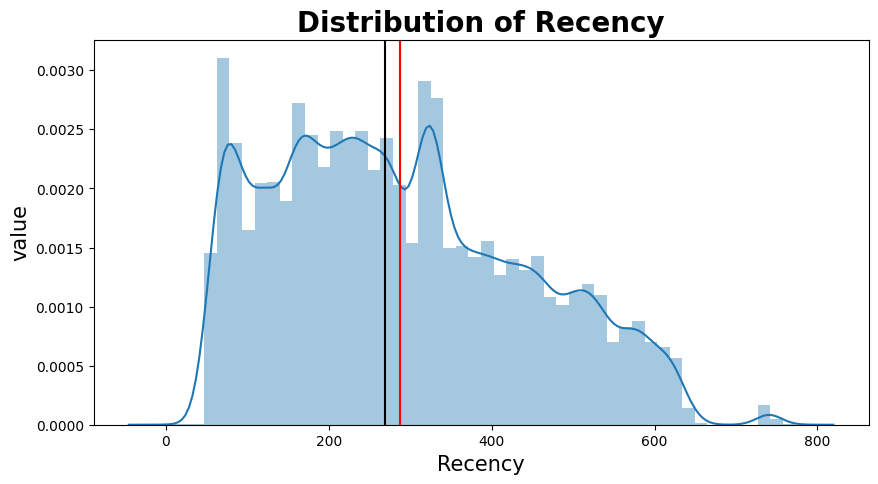

Mean of recency:  288.1347309763326
Median of recency:  269.0
Skewness of recency:  0.44561889147979705


In [18]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Recency)
plt.axvline(rfm.Recency.mean(), c = 'red')
plt.axvline(rfm.Recency.median(), c = 'black')
plt.title('Distribution of Recency',fontweight='bold',fontsize=20)
plt.xlabel('Recency',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of recency: ', rfm.Recency.mean())
print('Median of recency: ', rfm.Recency.median())
print('Skewness of recency: ', rfm.Recency.skew())

/var/folders/8d/jpws5c3x0nzbnt38414wd8qc0000gn/T/ipykernel_8881/3214567786.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




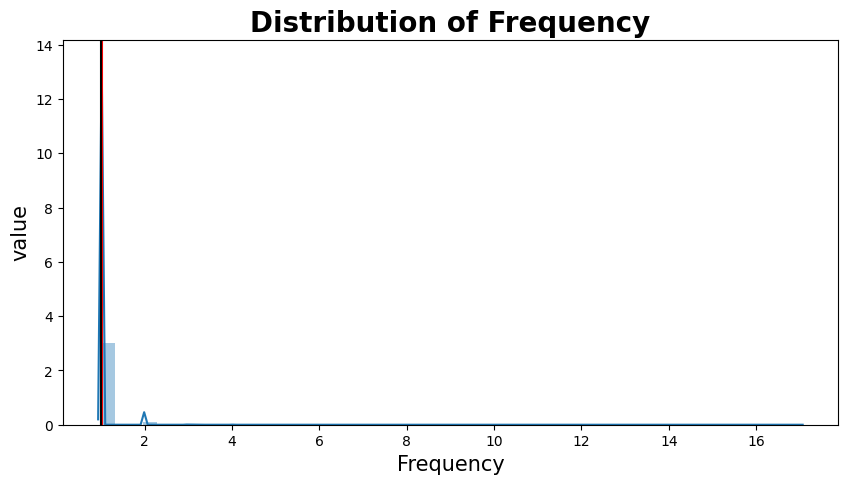

Mean of frequency:  1.0348019368034396
Median of frequency:  1.0
Skewness of frequency:  11.877436346029382


In [19]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Frequency)
plt.axvline(rfm.Frequency.mean(), c = 'red')
plt.axvline(rfm.Frequency.median(), c = 'black')
plt.title('Distribution of Frequency',fontweight='bold',fontsize=20)
plt.xlabel('Frequency',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of frequency: ', rfm.Frequency.mean())
print('Median of frequency: ', rfm.Frequency.median())
print('Skewness of frequency: ', rfm.Frequency.skew())

/var/folders/8d/jpws5c3x0nzbnt38414wd8qc0000gn/T/ipykernel_8881/4197457027.py:8: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


/Users/putuwistika/.pyenv/versions/3.10.16/envs/digits/lib/python3.10/site-packages/seaborn/distributions.py:2496: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.



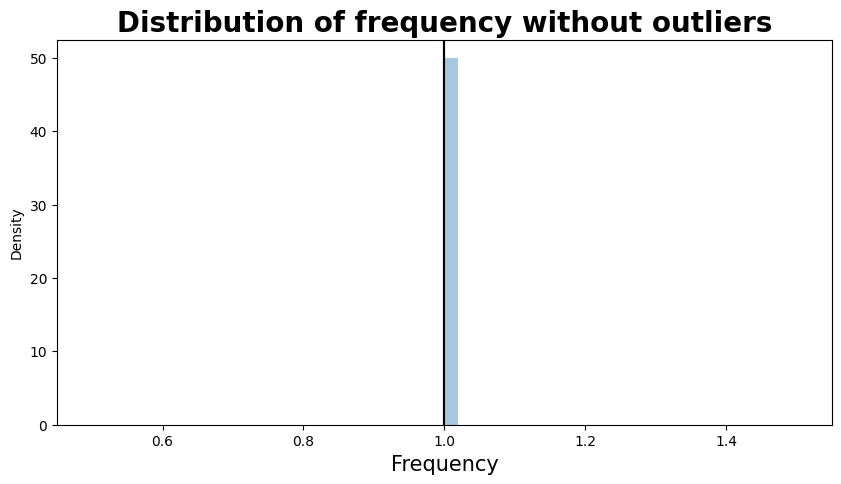

In [20]:
Q1 = np.quantile(rfm.Frequency, 0.25)
Q3 = np.quantile(rfm.Frequency, 0.75)
IQR = Q3 - Q1
frequencyDistribution = rfm[~((rfm.Frequency < Q1 - 1.5 * IQR) | (rfm.Frequency > Q3 + 1.5 * IQR))]
frequencyDistribution.head()

plt.figure(figsize=(10, 5))
sns.distplot(frequencyDistribution.Frequency)
plt.axvline(frequencyDistribution.Frequency.mean(), c = 'red')
plt.axvline(frequencyDistribution.Frequency.median(), c = 'black')
plt.xlabel('Frequency',color='black',fontsize=15)
plt.title('Distribution of frequency without outliers',color='black',fontsize=20,fontweight='bold')
plt.show()

In [21]:
frequencyDistribution.Frequency.describe()

count   92840.000000
mean        1.000000
std         0.000000
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Frequency, dtype: float64

The frequency from RFM analysis without outliers has a standard deviation of 0, that is, all the values are only 1.
So the frequency will not help in our analysis and also to segment the customers.

/var/folders/8d/jpws5c3x0nzbnt38414wd8qc0000gn/T/ipykernel_8881/15804976.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




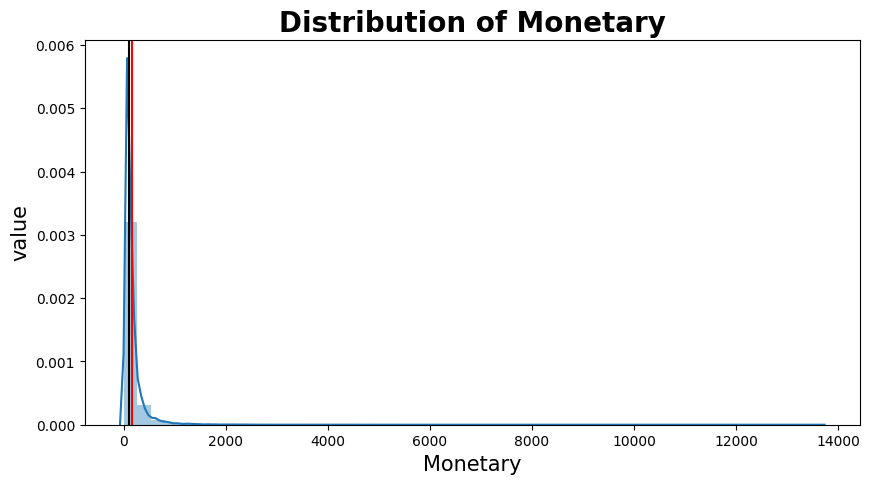

Mean of monetary:  163.80123606878993
Median of monetary:  106.29
Skewness of monetary:  9.61017961885641


In [22]:
plt.figure(figsize = (10, 5))
sns.distplot(rfm.Monetary)
plt.axvline(rfm.Monetary.mean(), c = 'red')
plt.axvline(rfm.Monetary.median(), c = 'black')
plt.title('Distribution of Monetary',fontweight='bold',fontsize=20)
plt.xlabel('Monetary',fontsize=15,color='black')
plt.ylabel('value',fontsize=15,color='black')
plt.show()
print('Mean of monetary: ', rfm.Monetary.mean())
print('Median of monetary: ', rfm.Monetary.median())
print('Skewness of monetary: ', rfm.Monetary.skew())

In [23]:
Q1 = np.quantile(rfm.Monetary, 0.25)
Q3 = np.quantile(rfm.Monetary, 0.75)
IQR = Q3 - Q1
monetaryDistribution = rfm[~((rfm.Monetary < Q1 - 1.5 * IQR) | (rfm.Monetary > Q3 + 1.5 * IQR))]
monetaryDistribution.head()

customer_unique_id  Recency  Frequency   Monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1 141.900000
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1  27.190000
2  0000f46a3911fa3c0805444483337064      586          1  86.220000
3  0000f6ccb0745a6a4b88665a16c9f078      370          1  43.620000
4  0004aac84e0df4da2b147fca70cf8255      337          1 196.890000

/var/folders/8d/jpws5c3x0nzbnt38414wd8qc0000gn/T/ipykernel_8881/1803402267.py:2: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751




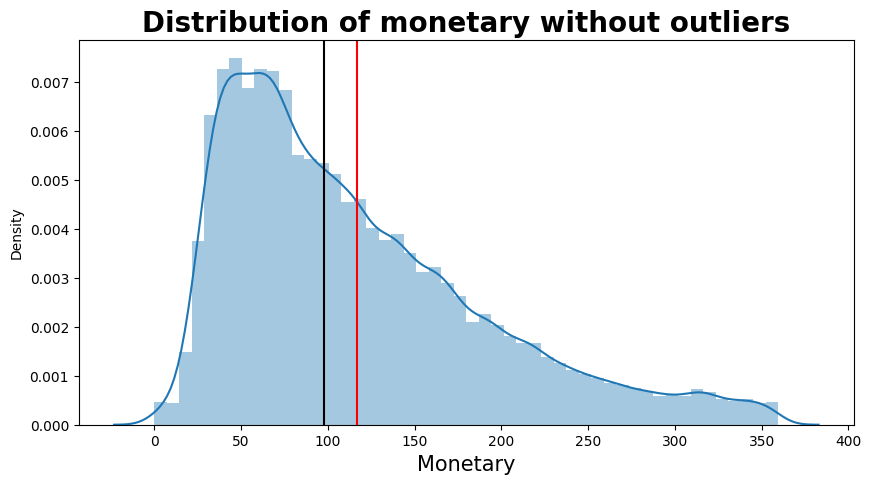

In [24]:
plt.figure(figsize=(10, 5))
sns.distplot(monetaryDistribution.Monetary)
plt.axvline(monetaryDistribution.Monetary.mean(), c = 'red')
plt.axvline(monetaryDistribution.Monetary.median(), c = 'black')
plt.xlabel('Monetary',color='black',fontsize=15)
plt.title('Distribution of monetary without outliers',color='black',fontsize=20,fontweight='bold')
plt.show()

In [25]:
monetaryDistribution.Monetary.describe()

count   88207.000000
mean      116.661183
std        75.393663
min         0.000000
25%        58.090000
50%        97.920000
75%       158.265000
max       359.640000
Name: Monetary, dtype: float64

The average monetary value after outlier treatement is 123.45, while the median value is 99.90.
The middle 50% of values of monetary lie between 59.38 and 165.3.

## Customer Segmentation

In [26]:
# Labels for Recency

ll_r = rfm.Recency.quantile(0.25)
mid_r = rfm.Recency.quantile(0.50)
ul_r = rfm.Recency.quantile(0.75)
print(ll_r, mid_r, ul_r)

164.0 269.0 397.0


In [27]:
def recency_label(recent):
    if recent <= ll_r:
        return 1
    elif (recent > ll_r) and (recent <= mid_r):
        return 2
    elif (recent > mid_r) and (recent <= ul_r):
        return 3
    elif recent > ul_r:
        return 4

In [28]:
rfm['recency_label'] = rfm.Recency.apply(recency_label)
rfm.head()

customer_unique_id  Recency  Frequency   Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1 141.900000   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1  27.190000   
2  0000f46a3911fa3c0805444483337064      586          1  86.220000   
3  0000f6ccb0745a6a4b88665a16c9f078      370          1  43.620000   
4  0004aac84e0df4da2b147fca70cf8255      337          1 196.890000   

   recency_label  
0              1  
1              1  
2              4  
3              3  
4              3

Recency label breakdown:
- 1 - These are the customers who whose visit date(s) are the most recent. (Recency value within the 25% quantile)
- 2 - These are the customers who whose visit date(s) are not very recent. (Recency value between 25% and 50% quantile)
- 3 - These are the customers who whose visit date(s) are somewhat recent. (Recency value between 50% and 75% quantile)
- 4 - These are the customers who whose visit date(s) are the oldest. (Recency value more than 75% quantile)

In [29]:
# Labels for Monetary

ll_m = rfm.Monetary.quantile(0.25)
mid_m = rfm.Monetary.quantile(0.50)
ul_m = rfm.Monetary.quantile(0.75)
print(ll_m, mid_m, ul_m)

61.5675 106.29 180.8


In [30]:
def monetary_label(money):
    if money <= ll_m:
        return 4
    elif (money > ll_m) and (money <= mid_m):
        return 3
    elif (money > mid_m) and (money <= ul_m):
        return 2
    elif money > ul_m:
        return 1

In [31]:
rfm['monetary_label'] = rfm.Monetary.apply(monetary_label)
rfm.head()

customer_unique_id  Recency  Frequency   Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1 141.900000   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1  27.190000   
2  0000f46a3911fa3c0805444483337064      586          1  86.220000   
3  0000f6ccb0745a6a4b88665a16c9f078      370          1  43.620000   
4  0004aac84e0df4da2b147fca70cf8255      337          1 196.890000   

   recency_label  monetary_label  
0              1               2  
1              1               4  
2              4               3  
3              3               4  
4              3               1

Monetary label breakdown:
- 1 - These are the customers who spend large amount. (Monetary value within the 25% quantile)
- 2 - These are the customers who spend good amount. (Monetary value between 25% and 50% quantile)
- 3 - These are the customers who spend moderately. (Monetary value between 50% and 75% quantile)
- 4 - These are the customers who spend the least. (Monetary value more than 75% quantile)

In [32]:
#Labels for Frequency

rfm.Frequency.value_counts()

Frequency
1     92840
2      2737
3       202
4        30
5         8
6         6
7         3
9         1
17        1
Name: count, dtype: int64

In [33]:
def frequency_label(frequent):
    if frequent == 1:
        return 4
    elif frequent == 2:
        return 3
    elif frequent == 3:
        return 2
    elif frequent > 3:
        return 1

In [34]:
rfm['frequency_label'] = rfm.Frequency.apply(frequency_label)
rfm.head()

customer_unique_id  Recency  Frequency   Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1 141.900000   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1  27.190000   
2  0000f46a3911fa3c0805444483337064      586          1  86.220000   
3  0000f6ccb0745a6a4b88665a16c9f078      370          1  43.620000   
4  0004aac84e0df4da2b147fca70cf8255      337          1 196.890000   

   recency_label  monetary_label  frequency_label  
0              1               2                4  
1              1               4                4  
2              4               3                4  
3              3               4                4  
4              3               1                4

Frequency label breakdown:
- 1 - These are the most frequent customers. (Frequency > 3)
- 2 - These are the frequent frequent customers. (Frequency = 3)
- 3 - These are the somewhat frequent customers. (Frequency = 2)
- 4 - These are the least frequent customers. (Frequency = 1)

In [35]:
rfm['Rank'] = list(zip(rfm.recency_label, rfm.monetary_label, rfm.frequency_label))
rfm.head()

customer_unique_id  Recency  Frequency   Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1 141.900000   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1  27.190000   
2  0000f46a3911fa3c0805444483337064      586          1  86.220000   
3  0000f6ccb0745a6a4b88665a16c9f078      370          1  43.620000   
4  0004aac84e0df4da2b147fca70cf8255      337          1 196.890000   

   recency_label  monetary_label  frequency_label       Rank  
0              1               2                4  (1, 2, 4)  
1              1               4                4  (1, 4, 4)  
2              4               3                4  (4, 3, 4)  
3              3               4                4  (3, 4, 4)  
4              3               1                4  (3, 1, 4)

In [36]:
rfm.recency_label.value_counts()

recency_label
1    24118
4    23945
2    23920
3    23845
Name: count, dtype: int64

In [37]:
rfm.frequency_label.value_counts()

frequency_label
4    92840
3     2737
2      202
1       49
Name: count, dtype: int64

In [38]:
rfm.monetary_label.value_counts()

monetary_label
3    23971
4    23957
1    23955
2    23945
Name: count, dtype: int64

In [39]:
rfm['rank_rm'] = list(zip(rfm.recency_label, rfm.monetary_label))
rfm.head()

customer_unique_id  Recency  Frequency   Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1 141.900000   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1  27.190000   
2  0000f46a3911fa3c0805444483337064      586          1  86.220000   
3  0000f6ccb0745a6a4b88665a16c9f078      370          1  43.620000   
4  0004aac84e0df4da2b147fca70cf8255      337          1 196.890000   

   recency_label  monetary_label  frequency_label       Rank rank_rm  
0              1               2                4  (1, 2, 4)  (1, 2)  
1              1               4                4  (1, 4, 4)  (1, 4)  
2              4               3                4  (4, 3, 4)  (4, 3)  
3              3               4                4  (3, 4, 4)  (3, 4)  
4              3               1                4  (3, 1, 4)  (3, 1)

In [40]:
rfm.rank_rm.value_counts()

rank_rm
(4, 4)    6227
(4, 3)    6209
(1, 2)    6203
(1, 1)    6160
(3, 3)    6122
(2, 2)    6102
(2, 1)    6033
(2, 4)    5992
(3, 2)    5965
(3, 1)    5928
(1, 4)    5908
(1, 3)    5847
(4, 1)    5834
(3, 4)    5830
(2, 3)    5793
(4, 2)    5675
Name: count, dtype: int64

Meaning of ranks:
The most important and least important customers (Recency Rank, Monetary Rank):

Comparing Recency and Monetary - Recency rank is of higher importance than Monetary rank
The most important ranks:

- (Recency - 1, Monetary - 1) - They are very recent and have spend a lot of money
- (Recency - 1, Monetary - 2) - They are very recent and have spend a good amount of money
- (Recency - 2, Monetary - 1) - They are recent and have spend a lot of money
- (Recency - 2, Monetary - 2) - They are recent and have spend a good of money
- (Recency - 1, Monetary - 3) - They are very recent and have spend a decent of money

The least important ranks:

- (Recency - 4, Monetary - 4) - They are not at all recent and spend a negligible amount of money
- (Recency - 4, Monetary - 3) - They are not at all recent and spend a a decent amount of money
- (Recency - 4, Monetary - 2) - They are not at all recent and spend a good amount of money
- (Recency - 3, Monetary - 4) - They are not very recent and spend a negligible amount of money
- (Recency - 3, Monetary - 3) - They are not very recent and spend a decent amount of money

Since most of the frequency class is 4, we will use only recency and monetary for customer segmentation.

Insights from Recency Ranks:

1. Customers can be incentivised to purchase more in our store using offers/discounts/events which will make them more recent and at the same time bring in more money
2. Customers will use our store if the website is user-friendly and quick. This will help make the customer's shopping experience smooth meaning they will continue coming back to our store/website for their purchasing needs
3. When advertising using digital marketing techniques:
- Customers who have a low recency ranks should be targeted less or removed from advertisement lists as it will not bring as much or even returns/sales (This can also be done using customer's time spent on website but that will be for a future project)
- Customers who have high recency ranks should be targeted more extensively as it will bring a lot of sales in return

Insights from Monetary Ranks:

1. Customer's monetary values can be increased with a better algorithm which will recommend similar/useful items when an item is added to cart

Insights from Frequency Ranks:
97% (89100 out of 91832) of the customers have the lowest frequency rank (4) meaning they are very infrequent in their purchases. In order to combat this:-

- Local language can be used in the ecommerce platform/store
- Extend special offers for repeated purchases
- Encourage Loyalty programs
- Lower the Product Pricing for Increased Customer Frequency

## Creating a target variable

In [83]:
# rfm['Churn'] = rfm.Recency.apply(lambda x: 1 if x > rfm.Recency.mean() else 0)
# rfm.head()


rfm['Churn'] = rfm.Recency.apply(lambda x: 1 if x > 90 else 0)
rfm.head()

customer_unique_id  Recency  Frequency   Monetary  \
0  0000366f3b9a7992bf8c76cfdf3221e2      160          1 141.900000   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      163          1  27.190000   
2  0000f46a3911fa3c0805444483337064      586          1  86.220000   
3  0000f6ccb0745a6a4b88665a16c9f078      370          1  43.620000   
4  0004aac84e0df4da2b147fca70cf8255      337          1 196.890000   

   recency_label  monetary_label  frequency_label       Rank rank_rm  Churn  
0              1               2                4  (1, 2, 4)  (1, 2)      1  
1              1               4                4  (1, 4, 4)  (1, 4)      1  
2              4               3                4  (4, 3, 4)  (4, 3)      1  
3              3               4                4  (3, 4, 4)  (3, 4)      1  
4              3               1                4  (3, 1, 4)  (3, 1)      1

In [84]:
rfm['Churn'].value_counts()

Churn
1    86286
0     9542
Name: count, dtype: int64

In [43]:
final = raw_data.merge(rfm[['customer_unique_id', 'Recency', 'Monetary', 'Frequency', 'Churn']], on = 'customer_unique_id')
final.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

                 customer_unique_id  customer_zip_code_prefix customer_city  \
0  7c396fd4830fd04220f754e42b4e5bff                      3149  Akkarampalle   
1  af07308b275d755c9edb36a90c618231                     47813     Pandariya   
2  3a653a41f6f9fc3d2a113cf8398680e8                     75265       Dhamdha   
3  7c142cf63193a1473d2e66489a9ae977                     59296     Kartarpur   
4  72632f0f9dd73dfee390c9b22eb56dd6                      9195   Bheemavaram   

   customer_state order_status order_purchase_timestamp   order_approved_at  \
0  Andhra Pradesh    delivered      2017-10-02 10:56:00 2017-10-02 11:07:00   
1    Chhattisgarh    delivered      2018-07-24 20:41:00 2018-07-26 03:24:00   
2    Chhattisgarh    delivered      2018-08-08 08:38:00 2018-08-08 08:55:00   
3          Punjab    delivered      2017-11-18 19:28:00 2017-11-18 19:45:00   
4  Andhra Pradesh    delivered      2018-02-13 21:18:00 2018-02-13 22:20:00   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:00   
1          2018-07-26 14:31:00           2018-08-07 15:27:00   
2          2018-08-08 13:50:00           2018-08-17 18:06:00   
3          2017-11-22 13:39:00           2017-12-02 00:28:00   
4          2018-02-14 19:46:00           2018-02-16 18:17:00   

  order_estimated_delivery_date  order_item_id  \
0                    2017-10-18       1.000000   
1                    2018-08-13       1.000000   
2                    2018-09-04       1.000000   
3                    2017-12-15       1.000000   
4                    2018-02-26       1.000000   

                         product_id product_category_name  \
0  87285b34884572647811a353c7ac498a            Housewares   
1  595fac2a385ac33a80bd5114aec74eb8             Perfumery   
2  aa4383b373c6aca5d8797843e5594415                  Auto   
3  d0b61bfb1de832b15ba9d266ca96e5b0              Pet_Shop   
4  65266b2da20d04dbe00c5c2d3bb7859e            Stationery   

   product_name_length  product_description_length  product_photos_qty  \
0            40.000000                  268.000000            4.000000   
1            29.000000                  178.000000            1.000000   
2            46.000000                  232.000000            1.000000   
3            59.000000                  468.000000            3.000000   
4            38.000000                  316.000000            4.000000   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  \
0        500.000000          19.000000           8.000000         13.000000   
1        400.000000          19.000000          13.000000         19.000000   
2        420.000000          24.000000          19.000000         21.000000   
3        450.000000          30.000000          10.000000         20.000000   
4        250.000000          51.000000          15.000000         15.000000   

                          seller_id   seller_city    seller_state  \
0  3504c0cb71d7fa48d967e0e4c94d59d9   Chhuikhadan    Chhattisgarh   
1  289cdb325fb7e7f891c38608bf9e0962     Anantapur  Andhra Pradesh   
2  4869f7a5dfa277a7dca6462dcf3b52b2  Freelandgunj         Gujarat   
3  66922902710d126a0e7d26b0e3805106     Anantapur  Andhra Pradesh   
4  2c9e548be18521d1c43cde1c582c6de8   Akkayapalle  Andhra Pradesh   

                          review_id  review_score review_creation_date  \
0  a54f0611adc9ed256b57ede6b6eb5114      4.000000           2017-10-11   
1  8d5266042046a06655c8db133d120ba5      4.000000           2018-08-08   
2  e73b67b67587f7644d5bd1a52

In [44]:
records, features = final.shape
print('Total number of unique records: ', records)
print('Total number of features: ', features)

Total number of unique records:  99163
Total number of features:  46


In [45]:
final['Churn'] = final.Churn.astype('object')

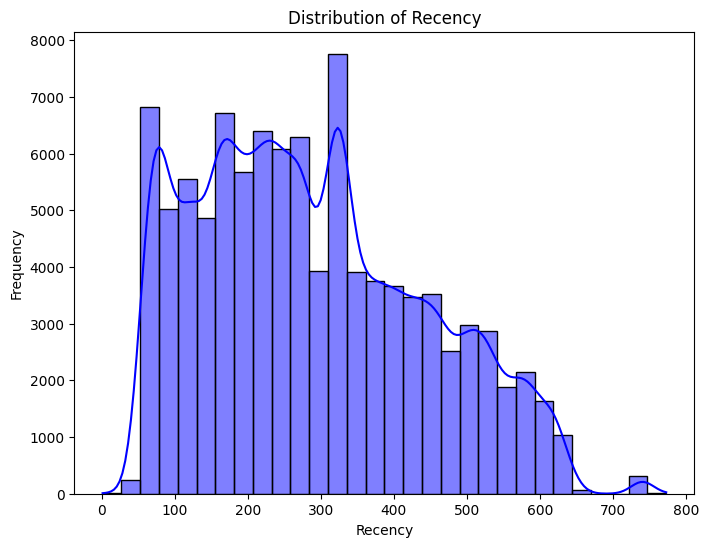

In [46]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming final['Recency'] is a pandas Series containing the data
plt.figure(figsize=(8, 6))

# Plotting the distribution using seaborn
sns.histplot(final['Recency'], kde=True, color='blue', bins=30)

# Adding labels and title
plt.title('Distribution of Recency')
plt.xlabel('Recency')
plt.ylabel('Frequency')

# Displaying the plot
plt.show()


In [47]:
final['Recency'].describe()

count   99163.000000
mean      287.348648
std       153.266870
min         1.000000
25%       163.000000
50%       268.000000
75%       396.000000
max       773.000000
Name: Recency, dtype: float64

# 2. Data Cleansing

## 1.1 Handle missing values

In [50]:
df = final.copy()

In [51]:
# Check missing values
print("\n1. Missing Values Check:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_summary[missing_summary['Missing Values'] > 0])


1. Missing Values Check:
                               Missing Values  Percentage
order_approved_at                         159    0.160342
order_delivered_carrier_date             1776    1.790991
order_delivered_customer_date            2951    2.975908
order_item_id                             986    0.994322
product_id                                986    0.994322
product_category_name                    2420    2.440426
product_name_length                      2398    2.418241
product_description_length               2398    2.418241
product_photos_qty                       2398    2.418241
product_weight_g                         1002    1.010458
product_length_cm                        1002    1.010458
product_height_cm                        1002    1.010458
product_width_cm                         1002    1.010458
seller_id                                 986    0.994322
seller_city                              2359    2.378911
seller_state                             2359 

In [52]:
# Menghapus baris yang memiliki missing values
df = df.dropna(axis=0, how='any')

In [53]:
# Check missing values
print("\n1. Missing Values Check:")
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage': missing_percentage
})
print(missing_summary[missing_summary['Missing Values'] > 0])


1. Missing Values Check:
Empty DataFrame
Columns: [Missing Values, Percentage]
Index: []


## 1.2 Handle duplicated data

In [54]:
# Mengecek apakah ada duplikat di setiap baris
duplicates = df.duplicated()

# Menampilkan jumlah duplikat dan baris yang duplikat
print(f"Jumlah baris duplikat: {duplicates.sum()}")
print("Baris yang duplikat:")
print(df[duplicates])

Jumlah baris duplikat: 0
Baris yang duplikat:
Empty DataFrame
Columns: [order_id, customer_id, customer_unique_id, customer_zip_code_prefix, customer_city, customer_state, order_status, order_purchase_timestamp, order_approved_at, order_delivered_carrier_date, order_delivered_customer_date, order_estimated_delivery_date, order_item_id, product_id, product_category_name, product_name_length, product_description_length, product_photos_qty, product_weight_g, product_length_cm, product_height_cm, product_width_cm, seller_id, seller_city, seller_state, review_id, review_score, review_creation_date, review_answer_timestamp, payment_sequential, payment_type, payment_installments, payment_value, geolocation_lat, geolocation_lng, geolocation_city, geolocation_state, purchased_approved, approved_carrier, carrier_delivered, delivered_estimated, purchased_delivered, Recency, Monetary, Frequency, Churn]
Index: []


# 3. Split Data

Data Split (untuk menghindari data leakage): Setelah data dibersihkan, Anda sebaiknya membagi data menjadi set pelatihan (train), validasi (val), dan pengujian (test). Lakukan pembagian data sebelum melakukan feature transformation atau encoding untuk menghindari data leakage, yaitu ketika informasi dari data test "terpapar" ke model selama pelatihan. Ini bisa menyebabkan overfitting.

## 3.1 Data Split

In [55]:
data = df.copy()

In [56]:
# Mendapatkan data churn
churn = data['Churn']

# Menghitung persentase dan jumlah churn serta non-churn
churn_percentage = round(churn.value_counts(normalize=True).iloc[1] * 100, 2)
non_churn_percentage = round(churn.value_counts(normalize=True).iloc[0] * 100, 2)
churn_count = churn.value_counts().iloc[1]
non_churn_count = churn.value_counts().iloc[0]

# Menampilkan hasil
print(f"Percentage of Churn: {churn_percentage} %  --> ({churn_count} customers)")
print(f"Percentage of Customers Did Not Churn: {non_churn_percentage} %  --> ({non_churn_count} customers)")


Percentage of Churn: 1.72 %  --> (1595 customers)
Percentage of Customers Did Not Churn: 98.28 %  --> (91165 customers)


In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 92760 entries, 0 to 99161
Data columns (total 46 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       92760 non-null  object        
 1   customer_id                    92760 non-null  object        
 2   customer_unique_id             92760 non-null  object        
 3   customer_zip_code_prefix       92760 non-null  int64         
 4   customer_city                  92760 non-null  object        
 5   customer_state                 92760 non-null  object        
 6   order_status                   92760 non-null  object        
 7   order_purchase_timestamp       92760 non-null  datetime64[ns]
 8   order_approved_at              92760 non-null  datetime64[ns]
 9   order_delivered_carrier_date   92760 non-null  datetime64[ns]
 10  order_delivered_customer_date  92760 non-null  datetime64[ns]
 11  order_estimated_deli

In [58]:
from sklearn.model_selection import train_test_split

# Pisahkan fitur dan target
X = data.drop(columns=['Churn'])  # Fitur (tanpa target)
y = data['Churn']  # Target

# Split data menjadi train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Cek hasil split
print("Jumlah data latih:", X_train.shape[0])
print("Jumlah data uji:", X_test.shape[0])


Jumlah data latih: 74208
Jumlah data uji: 18552


# 4. Feature Transformation

In [59]:
X_train

order_id                       customer_id  \
68154  3b9a17f139dcef391577a6dd21f65093  52d99a5beb79f63e9eedc2fbcdaca721   
17859  ad5a3cd2c183c5d45c24930fd68b58a6  683a74c85d1adc0b826dc6edc23587b4   
66145  7c7730a9be0a2cd5d43285e6e53476d8  a7daba5883cf6ca3236db2b589f66391   
11110  14e80e4600a8d7fafeb635d6d4ef7151  235dbacd9cbfaee70bf092cecac8b62d   
11160  f391902a7436d24842c938f2e5b1bc34  7119d3c62d0ed7d4c97aebe8bd6704ee   
...                                 ...                               ...   
82859  a8986837f6dff6a1dc83345fa71dcf1f  6bb94867dae81007c61bd428f1039373   
47012  cbd72908cd519d4501d42b94604a313a  dc731b7b1ea79314929ca4e222ded652   
58025  fb85c019b52b1481af6b89a96b84be4f  5de1dec4d4b43067084f74e791749ea2   
37718  ba1e49527baf8b4ad4b501e9dcaa9f6d  40eb4521dafbb310e123f62ed4c20225   
76316  106ff3ba3e84e22713bf2a10c582fd94  02d1b5b8831241174c6ef13efd35abbd   

                     customer_unique_id  customer_zip_code_prefix  \
68154  3e5a237352ac4b53e1281b9b62efcbcc                     84264   
17859  c7ec2bc1cfd0047fd1c6023fa0d25424                     96950   
66145  aa89a987e1e092c318fbdc4b0e3dcc44                      9060   
11110  1719cd1699c1b883aafc331361db0c02                     98130   
11160  d5f700b1428109c97e9671ff4b7a6fbb                      9580   
...                                 ...                       ...   
82859  e406bc46939bd98faaa641fb597a1915                      7190   
47012  f5dc702f5cb2bbcf543ecc755729a99c                     74893   
58025  e775c778b71318378072fdfa7630195e                      9820   
37718  0adcdbee22c9d0fc237cba6f28ca71d1                     81020   
76316  7c08375cd96553acf4ed275609fd22e7                     45000   

        customer_city   customer_state order_status order_purchase_timestamp  \
68154            Dola   Madhya Pradesh    delivered      2017-06-29 17:10:00   
17859     Thakurdwara    Uttar Pradesh    delivered      2018-02-21 11:17:00   
66145     Bheemavaram   Andhra Pradesh    delivered      2018-08-05 14:01:00   
11110           Banki           Orissa    delivered      2018-04-16 17:21:00   
11160       Vinukonda   Andhra Pradesh    delivered      2017-08-15 22:52:00   
...               ...              ...          ...                      ...   
82859   Bestavaripeta   Andhra Pradesh    delivered      2017-08-26 16:17:00   
47012  Bheemunipatnam   Andhra Pradesh    delivered      2018-03-25 18:29:00   
58025           Adoni   Andhra Pradesh    delivered      2017-11-24 01:18:00   
37718      Anakapalle   Andhra Pradesh    delivered      2018-01-09 21:31:00   
76316      Thanamandi  Jammu & Kashmir    delivered      2018-04-08 01:21:00   

        order_approved_at order_delivered_carrier_date  \
68154 2017-06-29 17:25:00          2017-06-30 14:10:00   
17859 2018-02-21 12:15:00          2018-02-22 00:04:00   
66145 2018-08-05 14:15:00          2018-08-07 12:33:00   
11110 2018-04-18 02:31:00          2018-04-18 18:22:00   
11160 2017-08-16 02:05:00          2017-08-23 19:06:00   
...                   ...                          ...   
82859 2017-08-29 05:32:00          2017-08-29 16:23:00   
47012 2018-03-26 18:35:00          2018-03-28 00:38:00   
58025 2017-11-24 01:33:00          2017-11-28 21:57:00   
37718 2018-01-10 10:31:00          2018-01-15 19:59:00   
76316 2018-04-08 01:35:00          2018-04-10 18:06:00   

      order_delivered_customer_date order_estimated_delivery_date  \
68154           2017-07-07 17:29:00                    2017-07-21   
17859           2018-03-07 22:42:00                    2018-03-19   
66145           2018-08-10 18:21:00                    2018-08-20   
11110           2018-05-02 12:32:00                    2018-05-21   
11160           2017-08-25 23:08:00                    2017-09-13   
...                             ...                           ...   
82859           2017-09-02 16:05:00                    2017-09-12   
47012           2018-04-17 20:58:00                    2018-04-23  

## 4.1 Handle outliers

In [60]:
# Deteksi dan penanganan outlier pada X_train
print("\n3. Outliers Check (using Z-score method):")
numeric_columns = X_train.select_dtypes(include=[np.number]).columns
outliers_summary = {}


3. Outliers Check (using Z-score method):


In [61]:
# Deteksi outlier dengan Z-score
for column in numeric_columns:
    z_scores = np.abs(stats.zscore(X_train[column].dropna()))
    outliers = len(z_scores[z_scores > 3])
    if outliers > 0:
        outliers_summary[column] = outliers

In [62]:
# Ringkasan outlier
if outliers_summary:
    print("Number of outliers (|Z-score| > 3) per column:")
    for col, count in outliers_summary.items():
        print(f"{col}: {count} outliers")
else:
    print("No significant outliers found in numeric columns")

Number of outliers (|Z-score| > 3) per column:
order_item_id: 1687 outliers
product_name_length: 384 outliers
product_description_length: 1840 outliers
product_photos_qty: 1121 outliers
product_weight_g: 1800 outliers
product_length_cm: 1477 outliers
product_height_cm: 1655 outliers
product_width_cm: 1127 outliers
payment_sequential: 1301 outliers
payment_installments: 232 outliers
payment_value: 1287 outliers
geolocation_lat: 1977 outliers
geolocation_lng: 468 outliers
purchased_approved: 1397 outliers
approved_carrier: 1559 outliers
carrier_delivered: 1164 outliers
delivered_estimated: 1039 outliers
purchased_delivered: 1242 outliers
Recency: 111 outliers
Monetary: 1268 outliers
Frequency: 568 outliers


Skewness of customer_zip_code_prefix: 0.7887528524008978
Standard deviation of customer_zip_code_prefix: 29761.54757536795


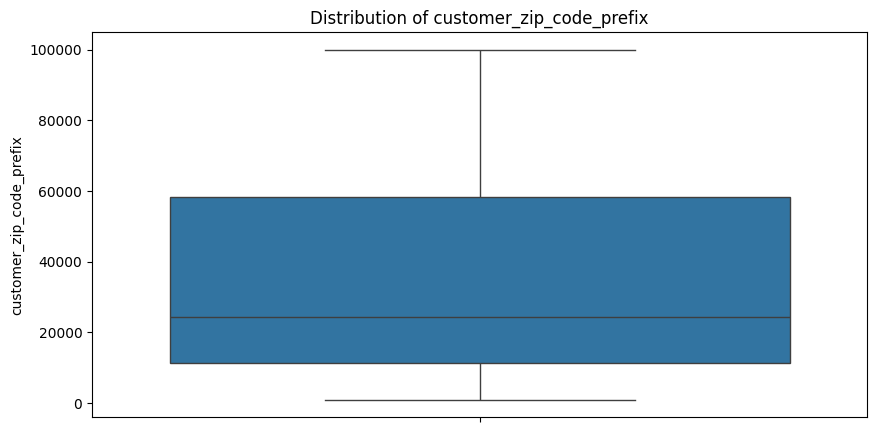

Skewness of order_item_id: 7.473713350132993
Standard deviation of order_item_id: 0.5317429783095071


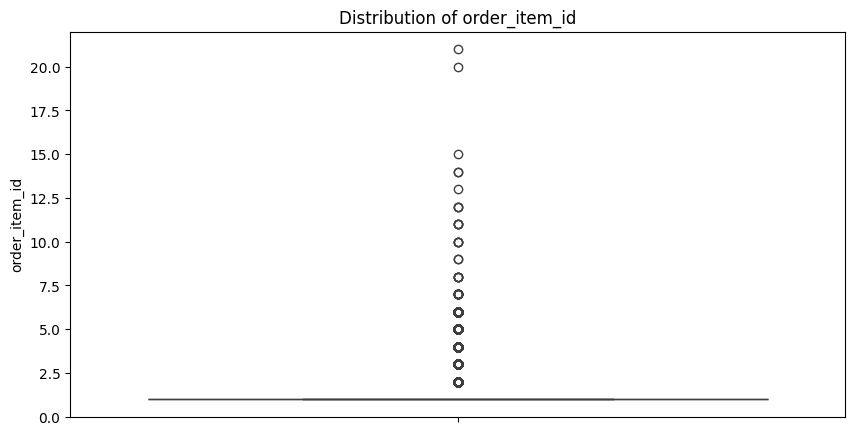

Skewness of product_name_length: -0.915891469330385
Standard deviation of product_name_length: 9.990039663287108


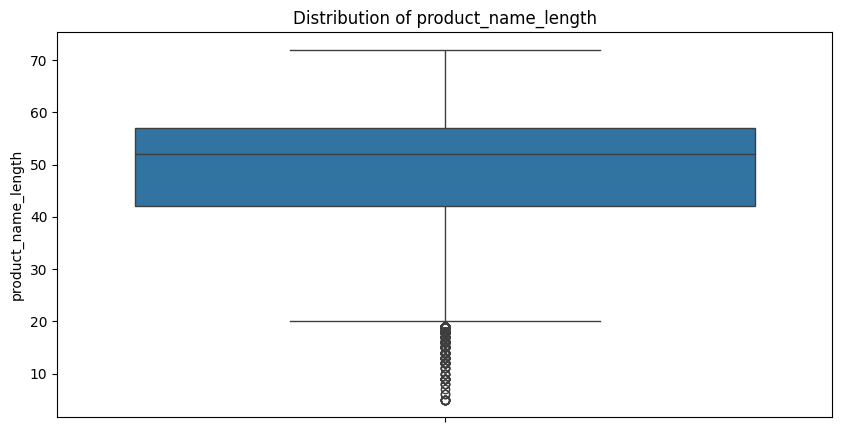

Skewness of product_description_length: 1.9921317563221004
Standard deviation of product_description_length: 653.3205285174429


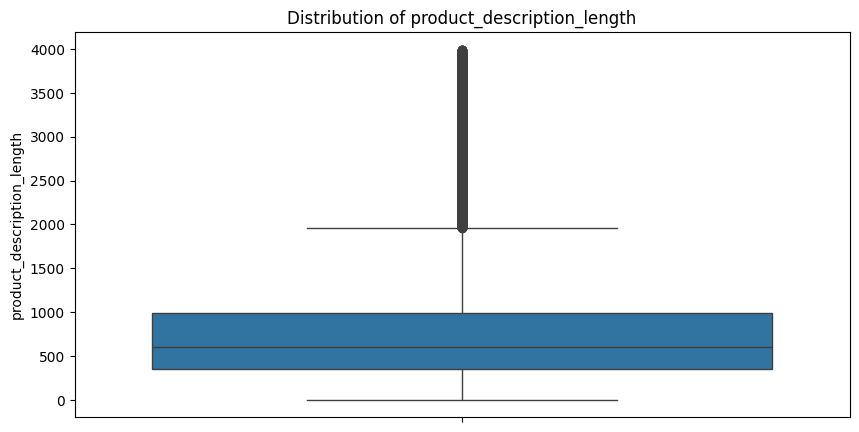

Skewness of product_photos_qty: 1.8481881767956116
Standard deviation of product_photos_qty: 1.7486835790400013


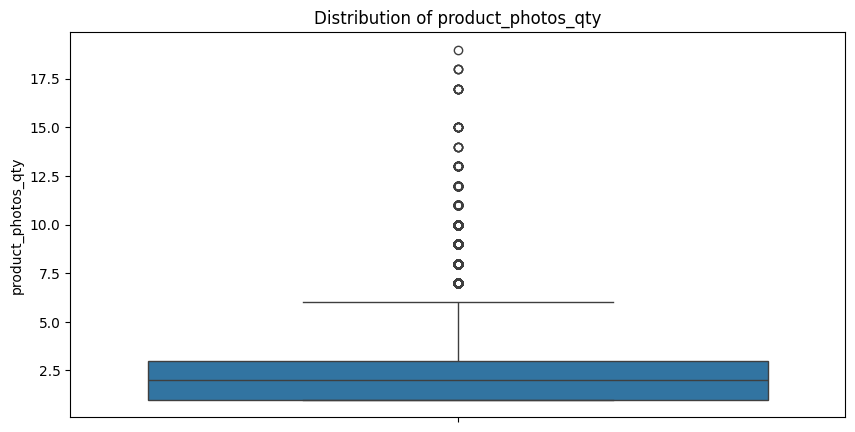

Skewness of product_weight_g: 3.6898471409518736
Standard deviation of product_weight_g: 3653.816259216178


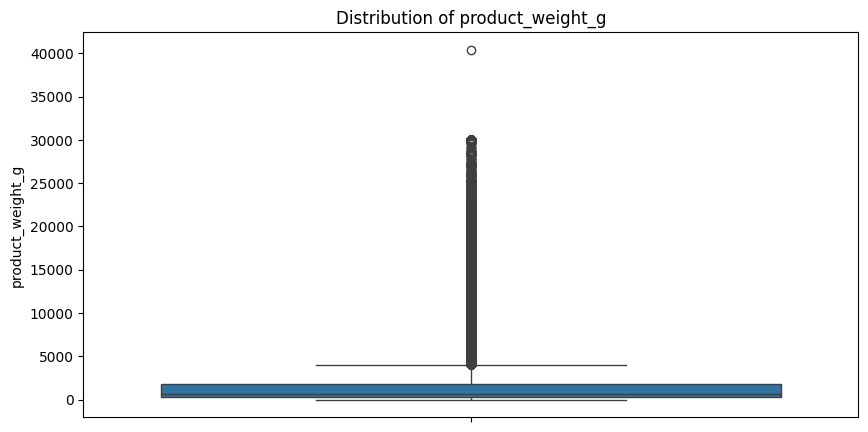

Skewness of product_length_cm: 1.7883351900341038
Standard deviation of product_length_cm: 16.101936841267186


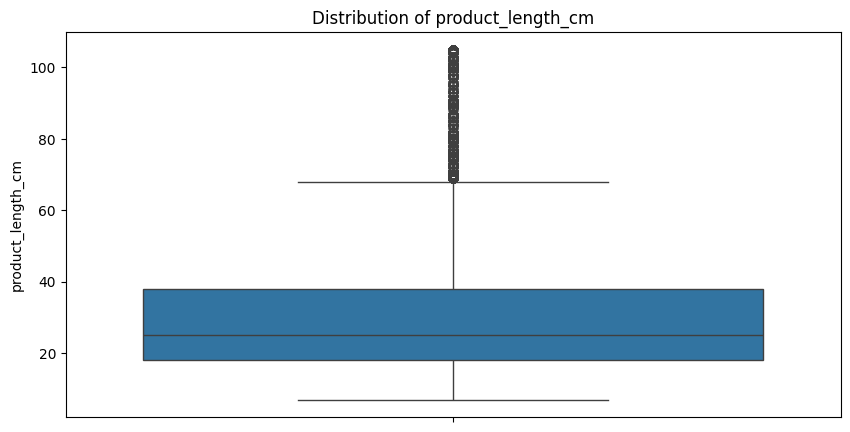

Skewness of product_height_cm: 2.275480946151787
Standard deviation of product_height_cm: 13.167662929953329


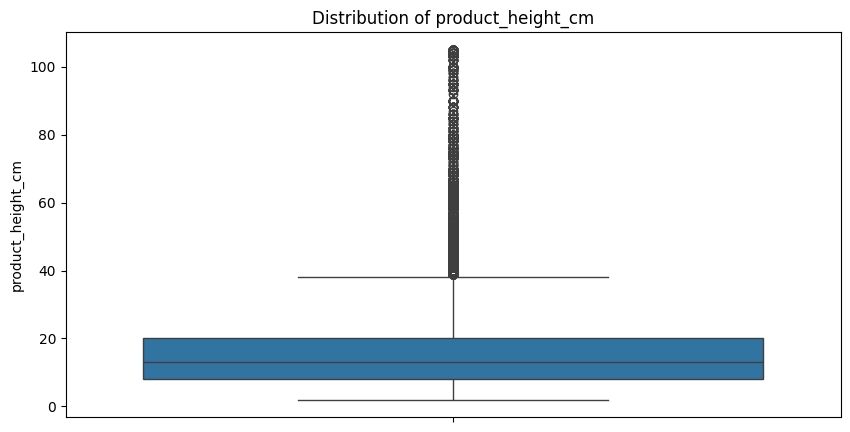

Skewness of product_width_cm: 1.738818898220858
Standard deviation of product_width_cm: 11.600246832458236


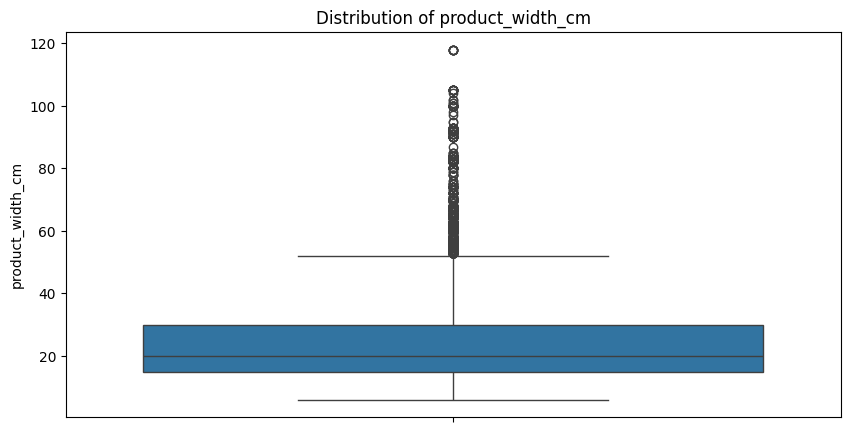

Skewness of review_score: -1.4622379815801179
Standard deviation of review_score: 1.2933580495923611


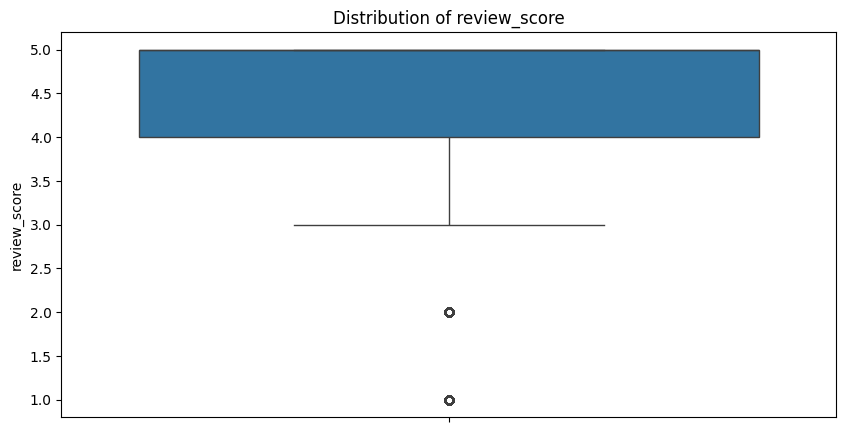

Skewness of payment_sequential: 26.311412138466
Standard deviation of payment_sequential: 0.23567844389273274


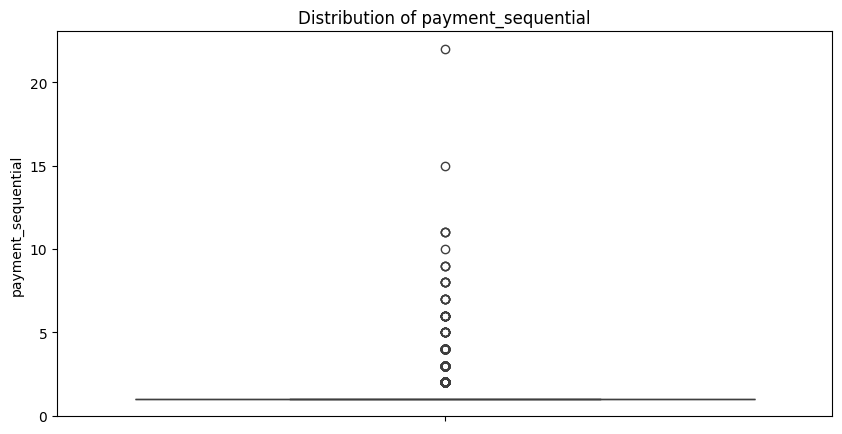

Skewness of payment_installments: 1.6126574063375212
Standard deviation of payment_installments: 2.702812061448506


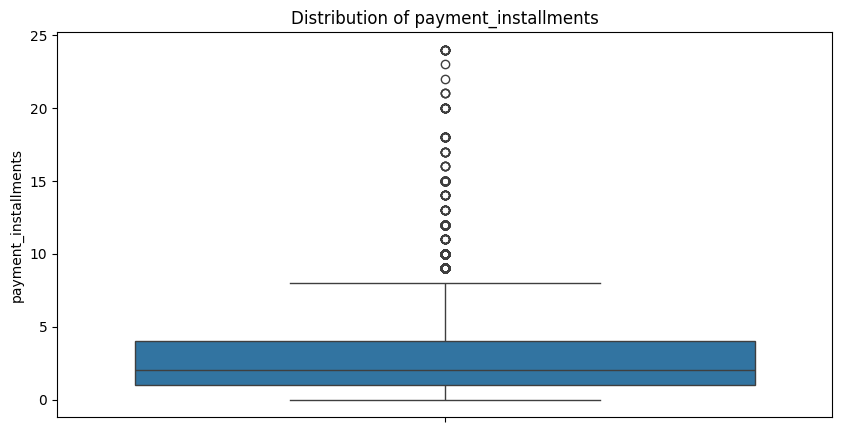

Skewness of payment_value: 10.347345299929284
Standard deviation of payment_value: 213.95765963233418


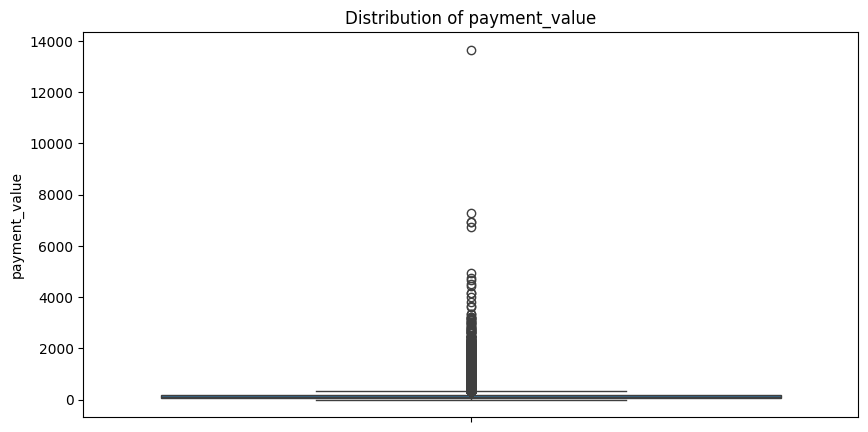

Skewness of geolocation_lat: 1.678891844885854
Standard deviation of geolocation_lat: 5.609649080504992


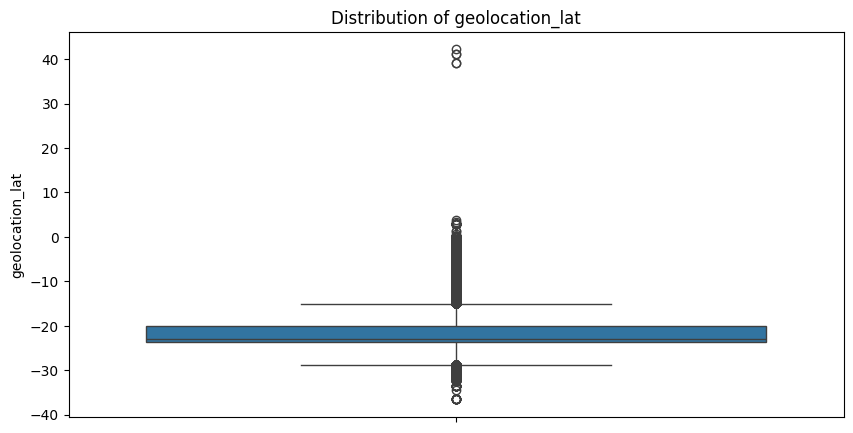

Skewness of geolocation_lng: 0.04288662659394553
Standard deviation of geolocation_lng: 4.068669144411143


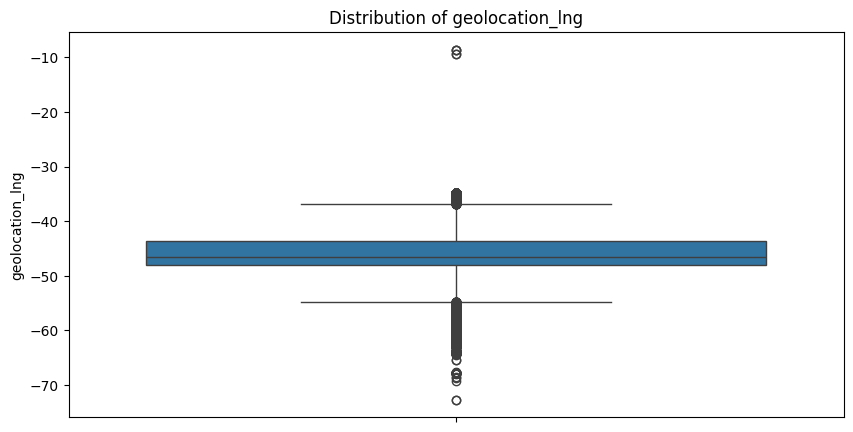

Skewness of purchased_approved: 1.6776368524452627
Standard deviation of purchased_approved: 23548.16064493548


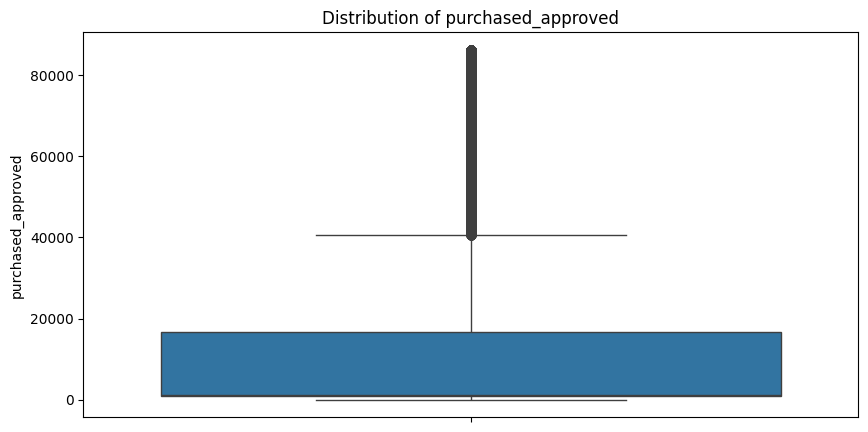

Skewness of approved_carrier: 2.8949898771469678
Standard deviation of approved_carrier: 3.558527448913284


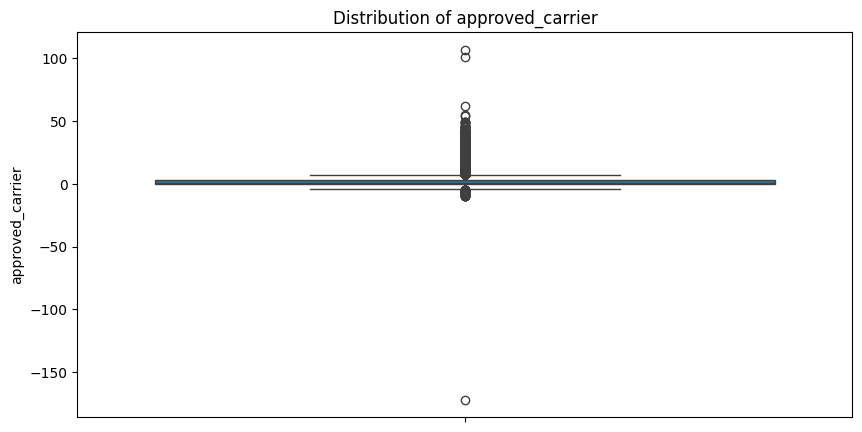

Skewness of carrier_delivered: 4.552793881131641
Standard deviation of carrier_delivered: 8.74419497382643


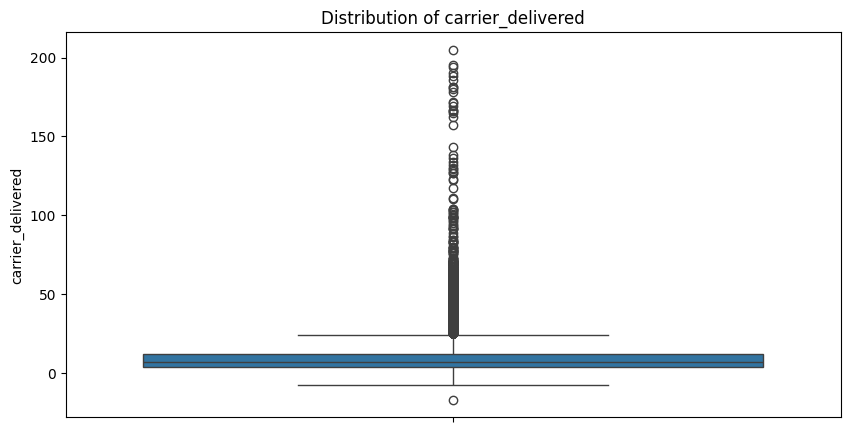

Skewness of delivered_estimated: -1.9616359853754919
Standard deviation of delivered_estimated: 10.177849813653344


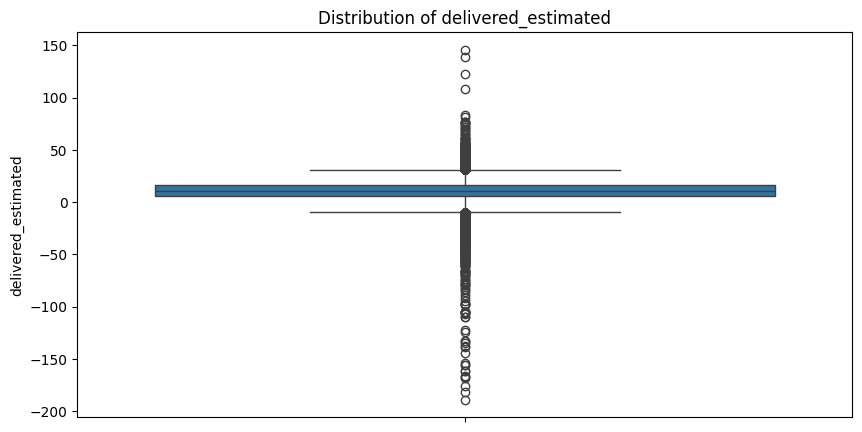

Skewness of purchased_delivered: 3.8050914369330076
Standard deviation of purchased_delivered: 9.534593994291468


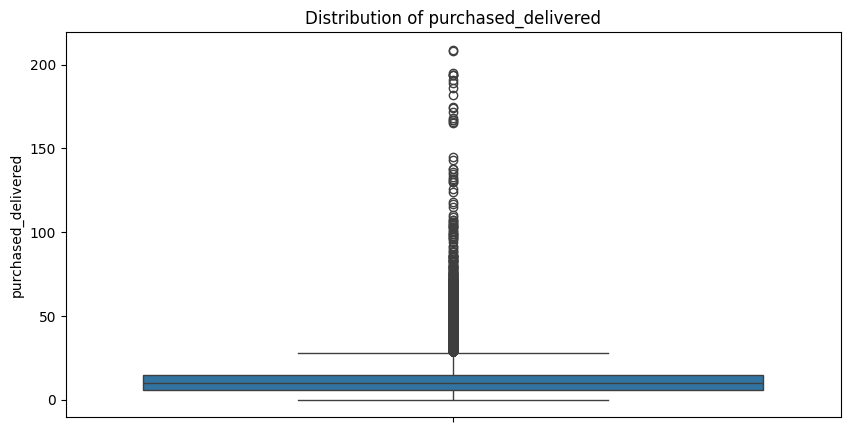

Skewness of Recency: 0.46349666511529874
Standard deviation of Recency: 152.08343129152234


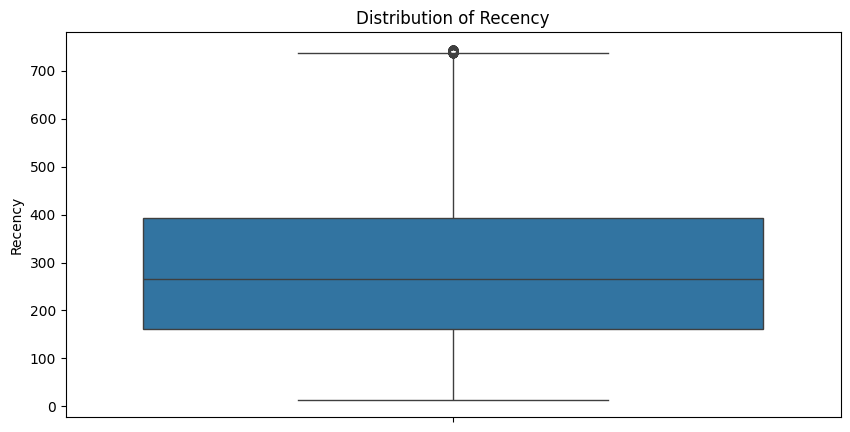

Skewness of Monetary: 9.670315863446334
Standard deviation of Monetary: 227.5011083978848


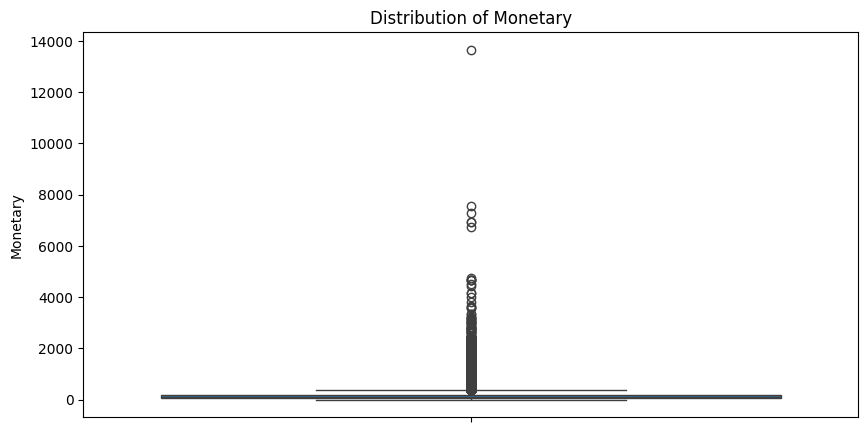

Skewness of Frequency: 16.620516606572906
Standard deviation of Frequency: 0.38937124337369466


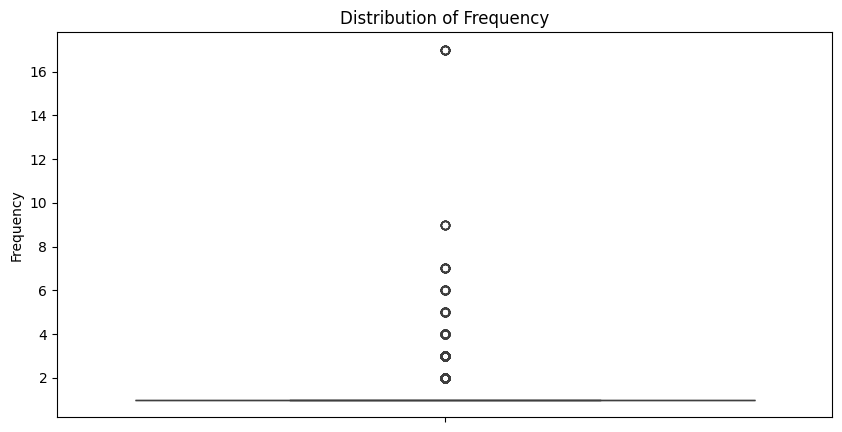

In [63]:
# Visualisasi distribusi awal dengan Boxplot
for col in X_train.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    print(f'Skewness of {col}: {X_train[col].skew()}')
    print(f'Standard deviation of {col}: {X_train[col].std()}')
    sns.boxplot(X_train[col])
    plt.title(f'Distribution of {col}')
    plt.show()

In [64]:
# Penanganan outlier menggunakan IQR
for col in X_train.select_dtypes(include=[np.number]).columns:
    q1 = X_train[col].quantile(0.25)
    q3 = X_train[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    X_train[col] = np.where(X_train[col] > upper_limit, upper_limit, X_train[col])
    X_train[col] = np.where(X_train[col] < lower_limit, lower_limit, X_train[col])


In [65]:
for col in X_test.select_dtypes(include=[np.number]).columns:
    q1 = X_train[col].quantile(0.25)  # Gunakan nilai dari X_train
    q3 = X_train[col].quantile(0.75)
    iqr = q3 - q1
    upper_limit = q3 + 1.5 * iqr
    lower_limit = q1 - 1.5 * iqr
    X_test[col] = np.where(X_test[col] > upper_limit, upper_limit, X_test[col])
    X_test[col] = np.where(X_test[col] < lower_limit, lower_limit, X_test[col])


## Drop Feature

In [66]:
# Kolom yang ingin dihapus
columns_to_drop = ['customer_zip_code_prefix', 'order_item_id', 'Frequency', 'payment_sequential','order_id', 'customer_id', 'customer_unique_id','product_id','order_purchase_timestamp','order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date','seller_id','review_id','review_answer_timestamp','review_creation_date','order_approved_at','geolocation_state','geolocation_city']

# Drop kolom pada X_train dan X_test
X_train.drop(columns=columns_to_drop, axis=1, inplace=True)
X_test.drop(columns=columns_to_drop, axis=1, inplace=True)

# Konfirmasi hasil
print("Kolom yang tersisa di X_train:")
print(X_train.columns)

print("\nKolom yang tersisa di X_test:")
print(X_test.columns)


Kolom yang tersisa di X_train:
Index(['customer_city', 'customer_state', 'order_status',
       'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_city', 'seller_state', 'review_score', 'payment_type',
       'payment_installments', 'payment_value', 'geolocation_lat',
       'geolocation_lng', 'purchased_approved', 'approved_carrier',
       'carrier_delivered', 'delivered_estimated', 'purchased_delivered',
       'Recency', 'Monetary'],
      dtype='object')

Kolom yang tersisa di X_test:
Index(['customer_city', 'customer_state', 'order_status',
       'product_category_name', 'product_name_length',
       'product_description_length', 'product_photos_qty', 'product_weight_g',
       'product_length_cm', 'product_height_cm', 'product_width_cm',
       'seller_city', 'seller_state', 'review_score', 'payment_type',
       'paymen

Skewness of product_name_length (after outlier treatment): -0.8706275661752777
Standard deviation of product_name_length (after outlier treatment): 9.91776738588084


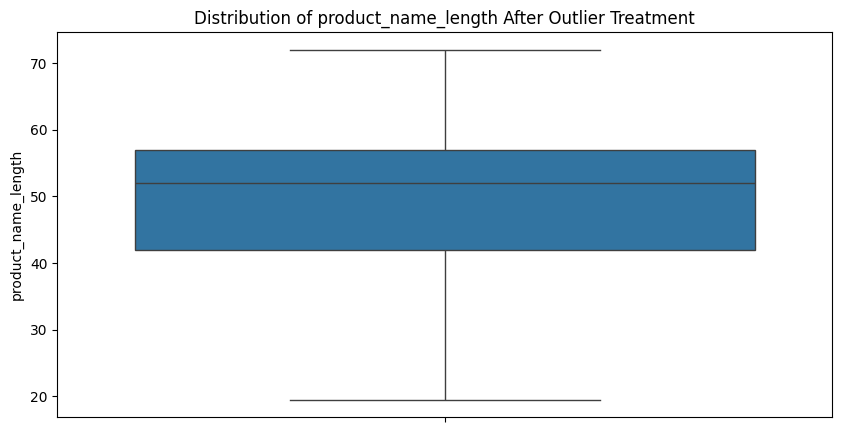

Skewness of product_description_length (after outlier treatment): 0.9998661783524125
Standard deviation of product_description_length (after outlier treatment): 514.070835891369


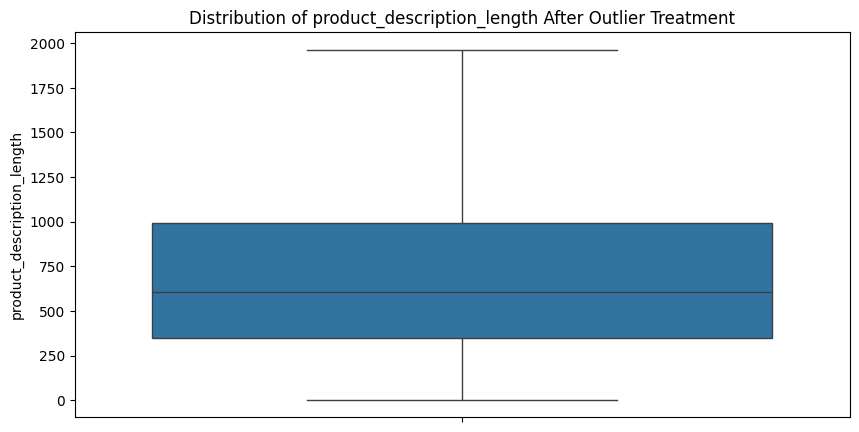

Skewness of product_photos_qty (after outlier treatment): 1.1976295992111987
Standard deviation of product_photos_qty (after outlier treatment): 1.5444628842485355


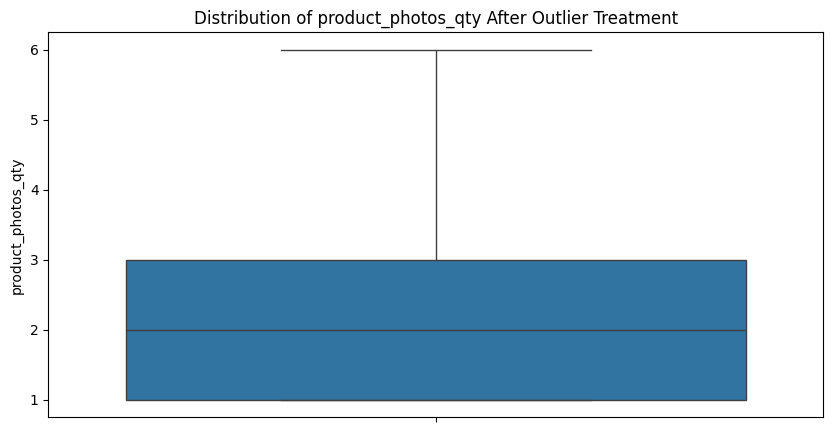

Skewness of product_weight_g (after outlier treatment): 1.147876383979592
Standard deviation of product_weight_g (after outlier treatment): 1346.5655608465004


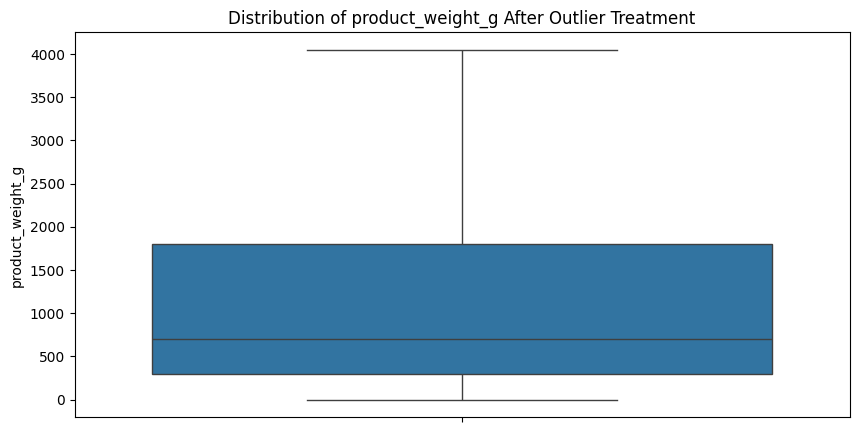

Skewness of product_length_cm (after outlier treatment): 1.154718787105504
Standard deviation of product_length_cm (after outlier treatment): 14.244312859202442


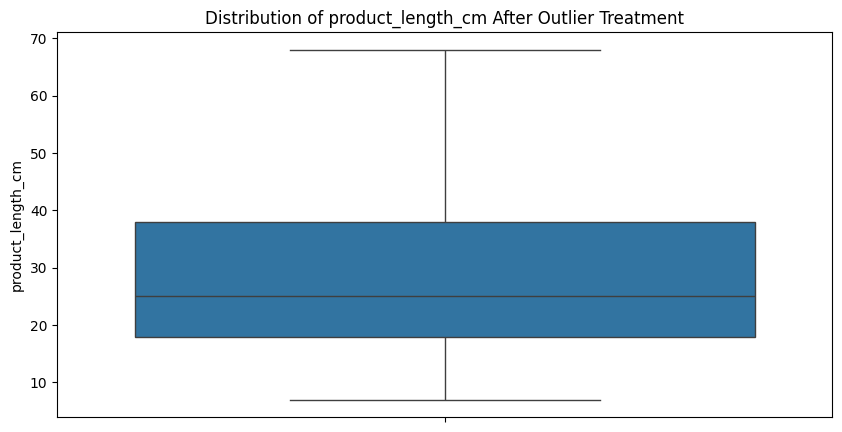

Skewness of product_height_cm (after outlier treatment): 0.8714926492051479
Standard deviation of product_height_cm (after outlier treatment): 9.853673985369351


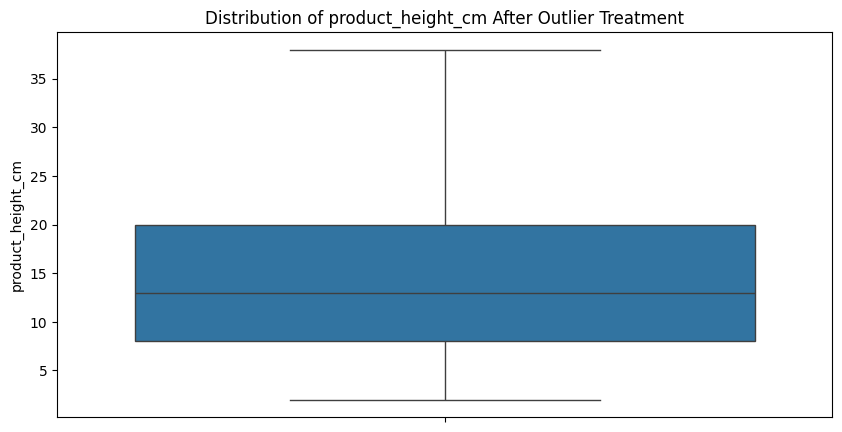

Skewness of product_width_cm (after outlier treatment): 1.0500676843581485
Standard deviation of product_width_cm (after outlier treatment): 10.547470348908043


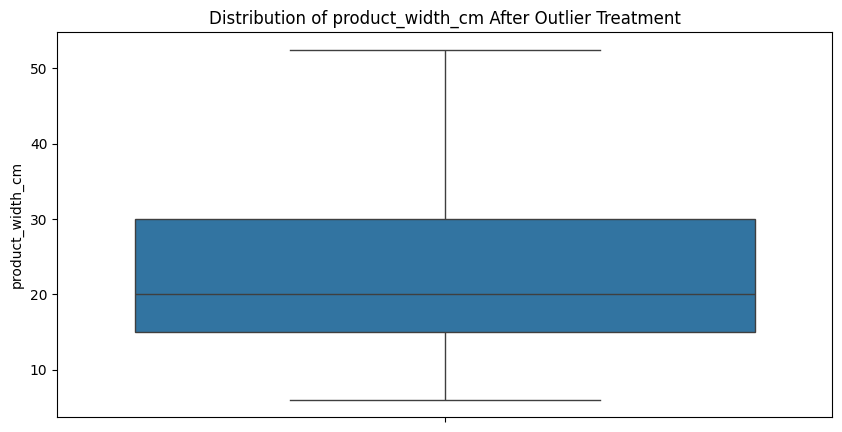

Skewness of review_score (after outlier treatment): -0.9525201619838141
Standard deviation of review_score (after outlier treatment): 0.9330302368683686


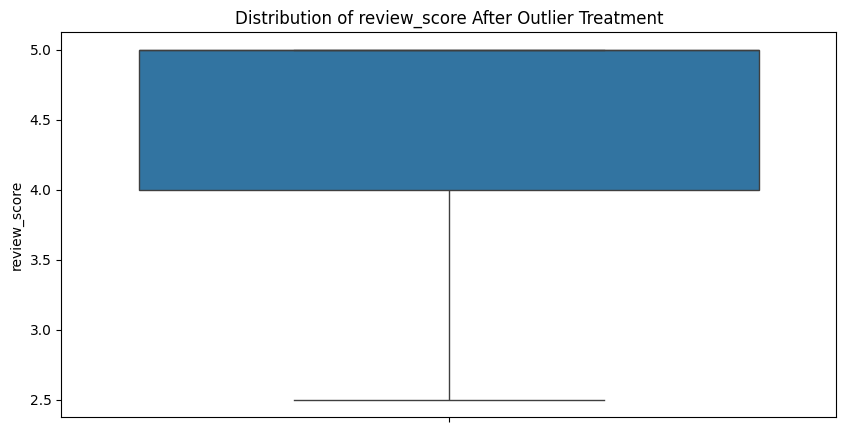

Skewness of payment_installments (after outlier treatment): 1.2354088931960616
Standard deviation of payment_installments (after outlier treatment): 2.4238787138140716


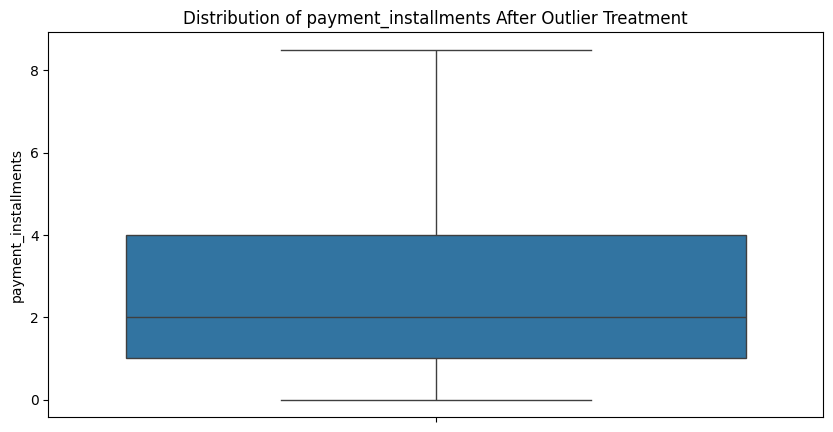

Skewness of payment_value (after outlier treatment): 1.0599277730664651
Standard deviation of payment_value (after outlier treatment): 92.79723436313823


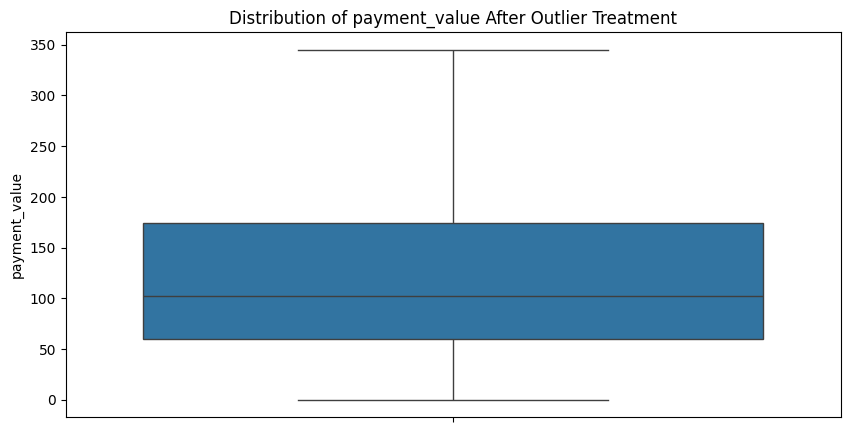

Skewness of geolocation_lat (after outlier treatment): 0.5276281354892597
Standard deviation of geolocation_lat (after outlier treatment): 3.5891078353105947


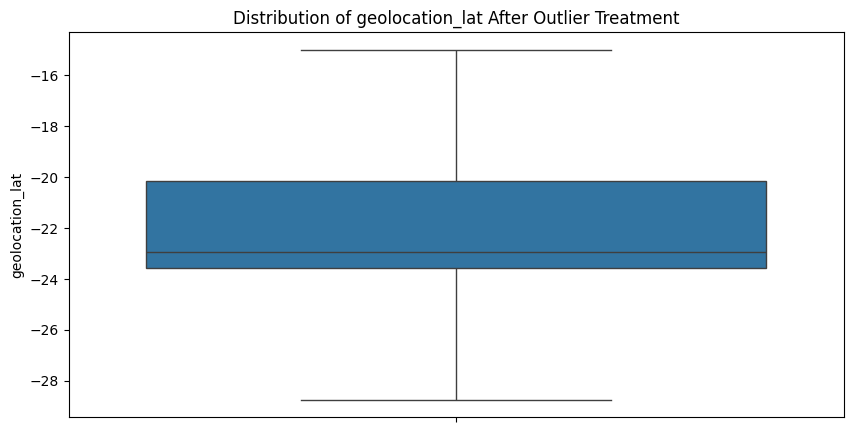

Skewness of geolocation_lng (after outlier treatment): 0.26408240541504213
Standard deviation of geolocation_lng (after outlier treatment): 3.7682718543662475


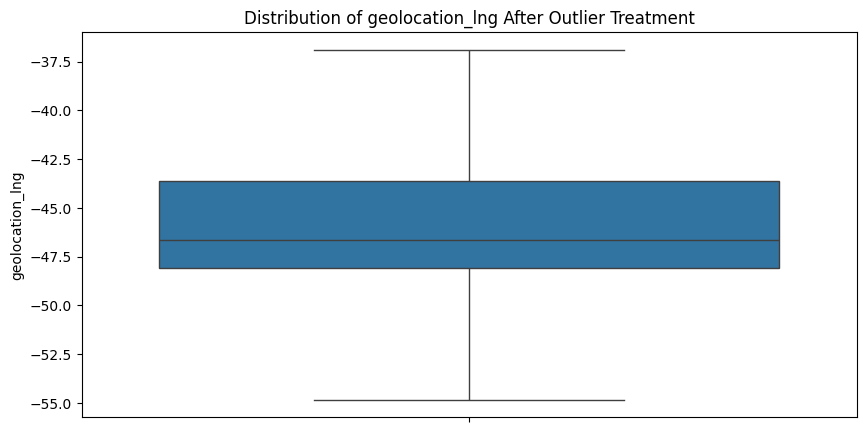

Skewness of purchased_approved (after outlier treatment): 1.2194749235589712
Standard deviation of purchased_approved (after outlier treatment): 15631.41109428852


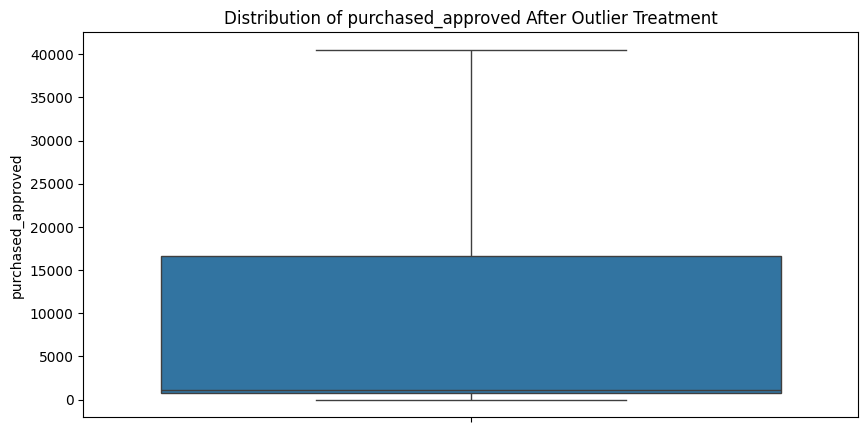

Skewness of approved_carrier (after outlier treatment): 1.0500899196509046
Standard deviation of approved_carrier (after outlier treatment): 2.199721163213311


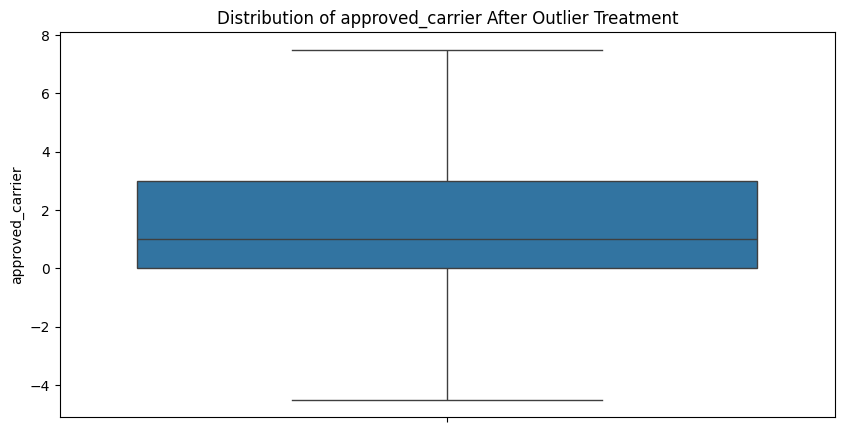

Skewness of carrier_delivered (after outlier treatment): 1.0042664279542746
Standard deviation of carrier_delivered (after outlier treatment): 6.283356466167894


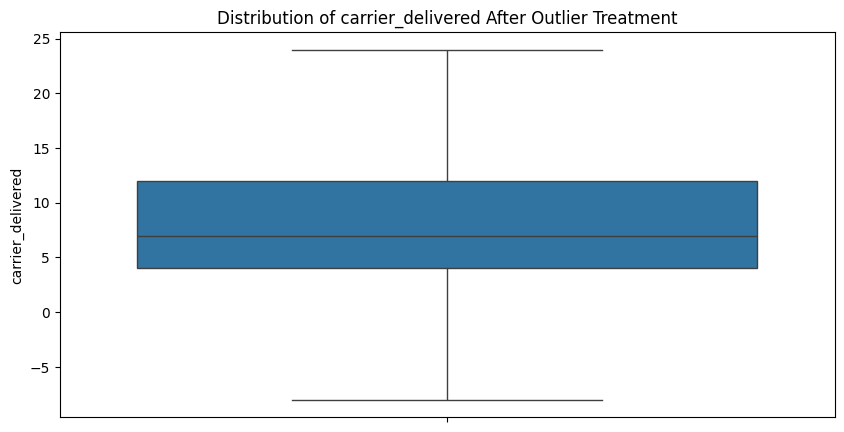

Skewness of delivered_estimated (after outlier treatment): -0.09782252997330936
Standard deviation of delivered_estimated (after outlier treatment): 8.269311052203175


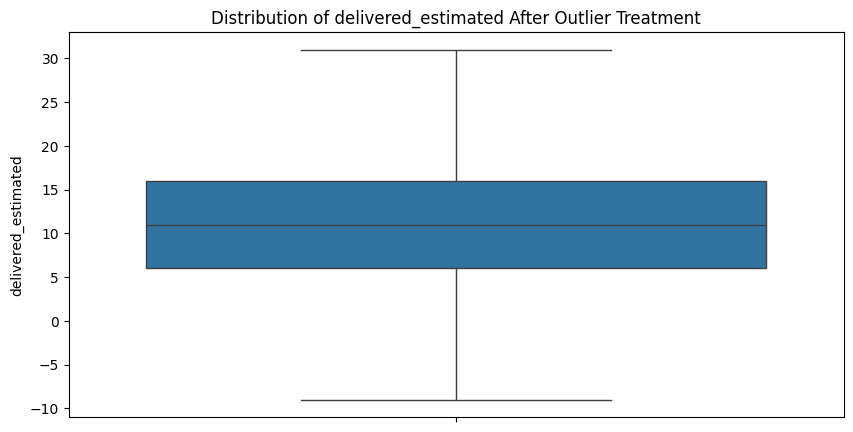

Skewness of purchased_delivered (after outlier treatment): 0.8817670322877249
Standard deviation of purchased_delivered (after outlier treatment): 7.11053002399194


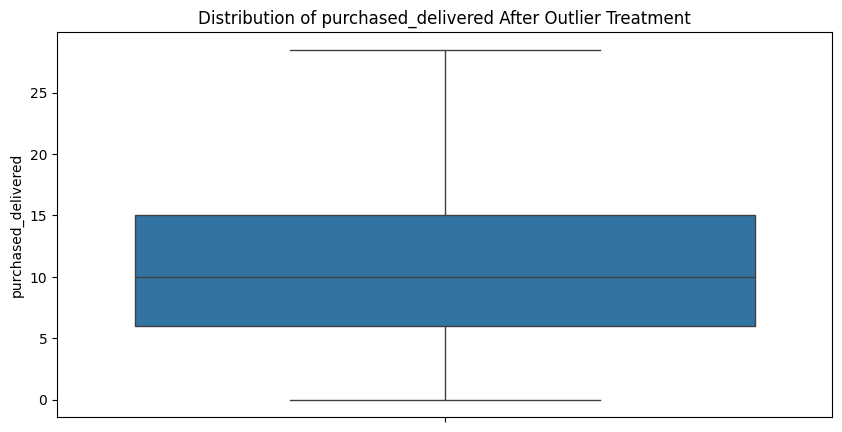

Skewness of Recency (after outlier treatment): 0.46220076908535757
Standard deviation of Recency (after outlier treatment): 152.0534864001078


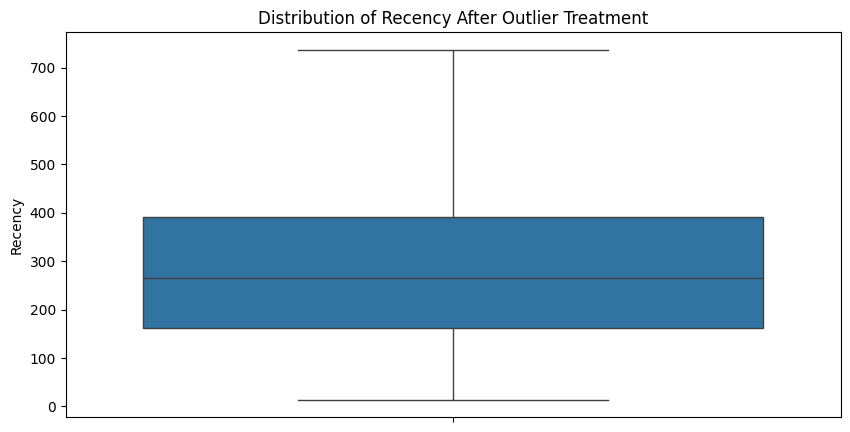

Skewness of Monetary (after outlier treatment): 1.070645775922674
Standard deviation of Monetary (after outlier treatment): 100.67021295047671


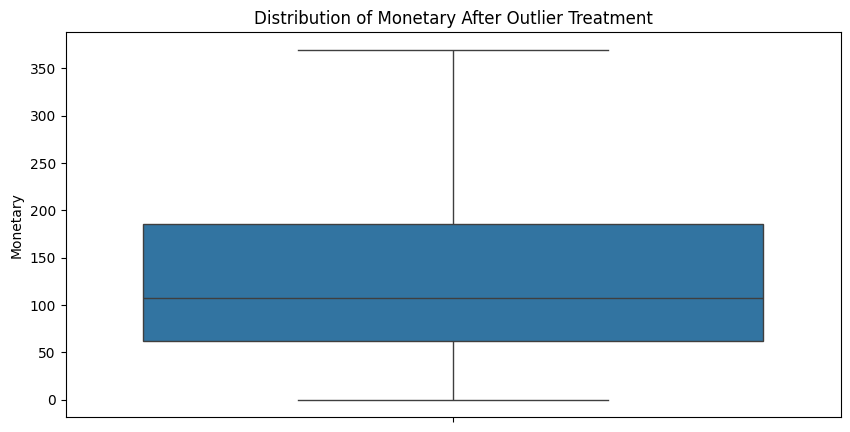

In [67]:
# Visualisasi distribusi setelah penanganan outlier
for col in X_train.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 5))
    print(f'Skewness of {col} (after outlier treatment): {X_train[col].skew()}')
    print(f'Standard deviation of {col} (after outlier treatment): {X_train[col].std()}')
    sns.boxplot(X_train[col])
    plt.title(f'Distribution of {col} After Outlier Treatment')
    plt.show()

In [68]:
X_train.shape

(74208, 26)

The outliers are treated by the method of capping.
Values which fall outside of the upper and lower whisker are capped to the upper and lower whisker values respectively.
Since dropping the values would lead to loss of huge volumes of data, we prefer to cap the values.

## Correlation Matrix of Numerical Variables

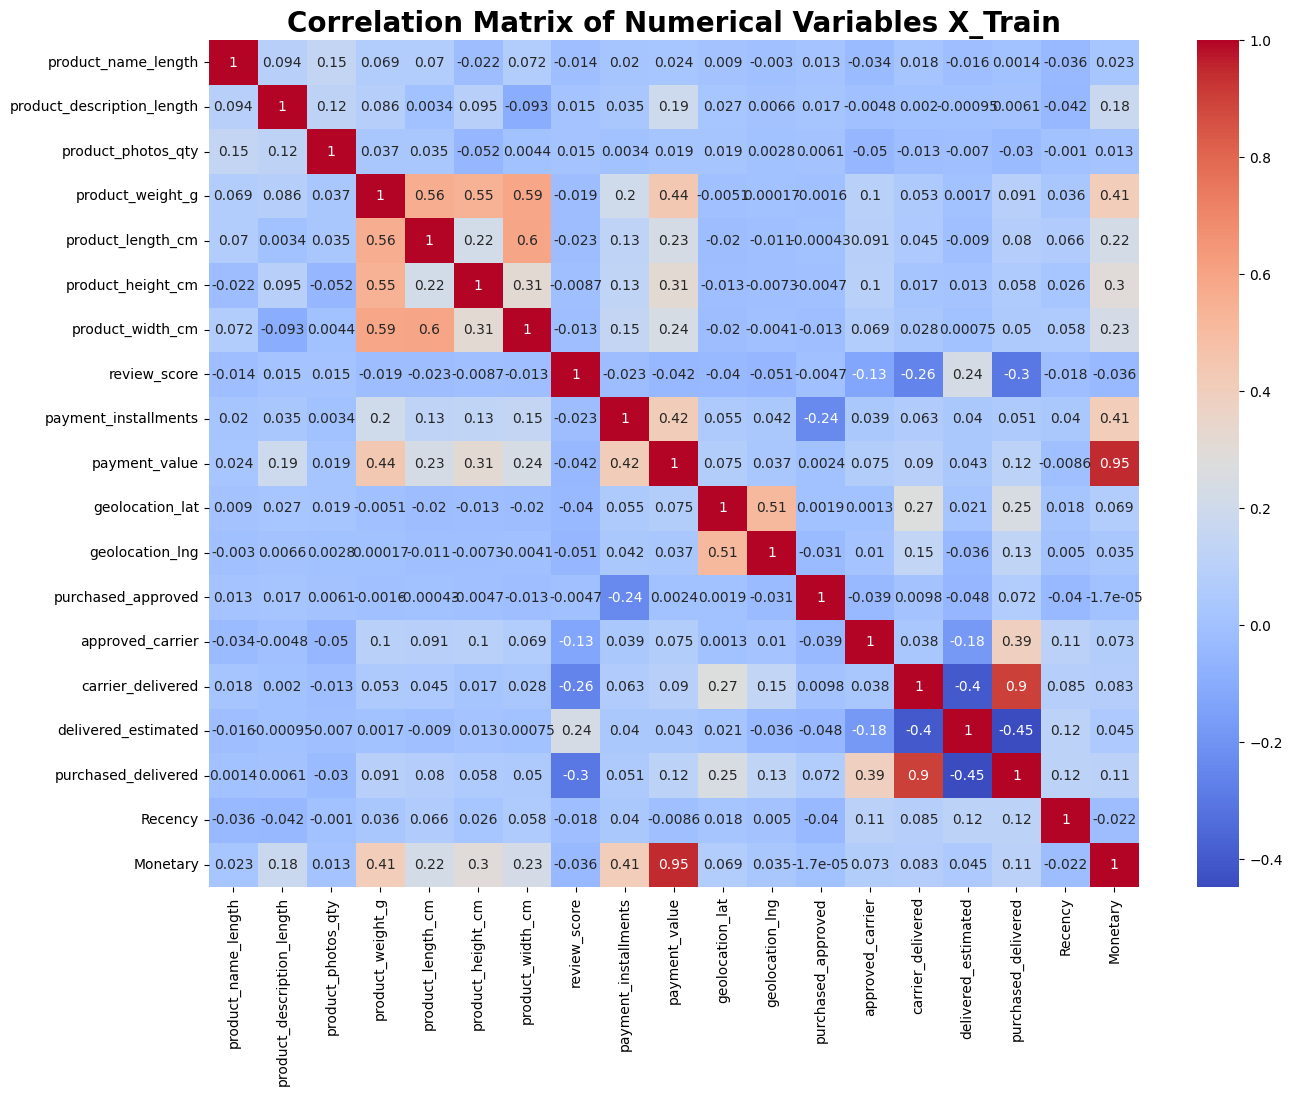

In [69]:
# Memilih hanya kolom numerik dari DataFrame
numerical_data = X_train.select_dtypes(include=['number'])

# Plot heatmap korelasi
plt.figure(figsize=(15, 11))
sns.heatmap(numerical_data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Numerical Variables X_Train', fontsize=20, fontweight='bold')
plt.show()

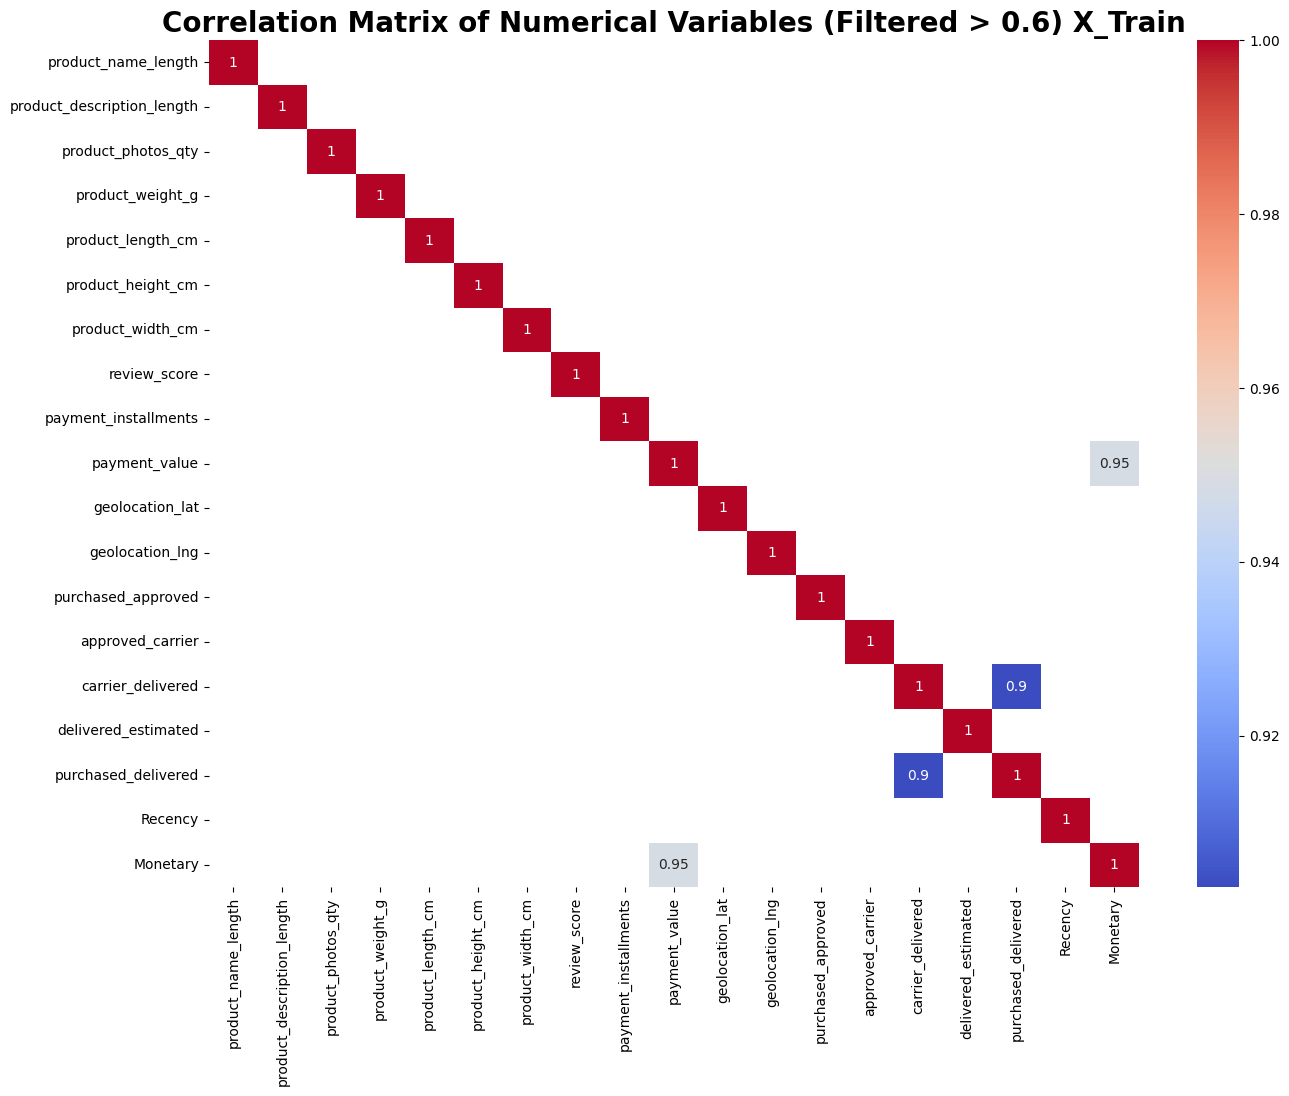

In [70]:
# Memilih hanya kolom numerik
numerical_data = X_train.select_dtypes(include=['number'])

# Menghitung matriks korelasi
correlation_matrix = numerical_data.corr()

# Memfilter nilai korelasi > 0.6 (selain diagonal 1.0)
filtered_corr = correlation_matrix.where(correlation_matrix > 0.6)

# Plot heatmap
plt.figure(figsize=(15, 11))
sns.heatmap(filtered_corr, annot=True, cmap='coolwarm', mask=filtered_corr.isnull())
plt.title('Correlation Matrix of Numerical Variables (Filtered > 0.6) X_Train', fontsize=20, fontweight='bold')
plt.show()


In [71]:
X_train

customer_city   customer_state order_status product_category_name  \
68154            Dola   Madhya Pradesh    delivered                  Auto   
17859     Thakurdwara    Uttar Pradesh    delivered                  Baby   
66145     Bheemavaram   Andhra Pradesh    delivered       Furniture_Decor   
11110           Banki           Orissa    delivered             Telephony   
11160       Vinukonda   Andhra Pradesh    delivered        Bed_Bath_Table   
...               ...              ...          ...                   ...   
82859   Bestavaripeta   Andhra Pradesh    delivered        Bed_Bath_Table   
47012  Bheemunipatnam   Andhra Pradesh    delivered         Health_Beauty   
58025           Adoni   Andhra Pradesh    delivered            Cool_Stuff   
37718      Anakapalle   Andhra Pradesh    delivered                  Toys   
76316      Thanamandi  Jammu & Kashmir    delivered             Computers   

       product_name_length  product_description_length  product_photos_qty  \
68154            52.000000                  603.000000            1.000000   
17859            53.000000                  704.000000            3.000000   
66145            33.000000                  195.000000            1.000000   
11110            26.000000                  108.000000            1.000000   
11160            40.000000                  702.000000            1.000000   
...                    ...                         ...                 ...   
82859            56.000000                  162.000000            5.000000   
47012            51.000000                  625.000000            1.000000   
58025            48.000000                  330.000000            1.000000   
37718            27.000000                  867.000000            5.000000   
76316            55.000000                 1105.000000            1.000000   

       product_weight_g  product_length_cm  product_height_cm  \
68154       4050.000000          61.000000          14.000000   
17859       4050.000000          60.000000          20.000000   
66145        750.000000          30.000000          11.000000   
11110        128.000000          15.000000           8.000000   
11160       1000.000000          50.000000          12.000000   
...                 ...                ...                ...   
82859       4050.000000          35.000000          12.000000   
47012        900.000000          25.000000          12.000000   
58025       1950.000000          33.000000          38.000000   
37718        300.000000          22.000000           6.000000   
76316       4050.000000          27.000000          38.000000   

       product_width_cm    seller_city       seller_state  review_score  \
68154         52.500000  Bestavaripeta     Andhra Pradesh      5.000000   
17859         50.000000     Anakapalle     Andhra Pradesh      5.000000   
66145         20.000000         Daroha             Punjab      4.000000   
11110         13.000000       Adilabad     Andhra Pradesh      4.000000   
11160         12.000000     Anakapalle     Andhra Pradesh      5.000000   
...                 ...            ...                ...           ...   
82859         30.000000   Akkarampalle     Andhra Pradesh      5.000000   
47012         38.000000     Anakapalle     Andhra Pradesh      3.000000   
58025         19.000000          Along  Arunachal Pradesh      5.000000   
37718         16.000000   Akkarampalle     Andhra Pradesh      4.000000   
76316         52.500000   Sarkhej-Okaf            Gujarat      5.000000   

      payment_type  payment_installments  payment_value  geolocation_lat  \
68154  credit_card              1.000000     345.188750       -24.348163   
17859  credit_card              3.000000     148.160000       -28.751194   
66145      voucher              1.000000      39.340000       -23.656294   
11110          UPI              1.000000      64.130000       -28.751194   
11160  credit_card              5.000000      56.600000       -23.640572   
...     

## Normalisasi

In [72]:
# Untuk X_train
numeric_cols_train = X_train.select_dtypes(include=[np.number]).columns
skewness_train = X_train[numeric_cols_train].skew()

# Untuk X_test
numeric_cols_test = X_test.select_dtypes(include=[np.number]).columns
skewness_test = X_test[numeric_cols_test].skew()

# Menampilkan skewness
print("Skewness for X_train:")
print(skewness_train)

print("\nSkewness for X_test:")
print(skewness_test)



Skewness for X_train:
product_name_length          -0.870628
product_description_length    0.999866
product_photos_qty            1.197630
product_weight_g              1.147876
product_length_cm             1.154719
product_height_cm             0.871493
product_width_cm              1.050068
review_score                 -0.952520
payment_installments          1.235409
payment_value                 1.059928
geolocation_lat               0.527628
geolocation_lng               0.264082
purchased_approved            1.219475
approved_carrier              1.050090
carrier_delivered             1.004266
delivered_estimated          -0.097823
purchased_delivered           0.881767
Recency                       0.462201
Monetary                      1.070646
dtype: float64

Skewness for X_test:
product_name_length          -0.890721
product_description_length    1.004855
product_photos_qty            1.206575
product_weight_g              1.140523
product_length_cm             1.160858
produ

Jika skewness mendekati 0, distribusi data dianggap simetris atau mendekati normal.
Jika skewness positif, data miring ke kanan (tail kanan lebih panjang).
Jika skewness negatif, data miring ke kiri (tail kiri lebih panjang).

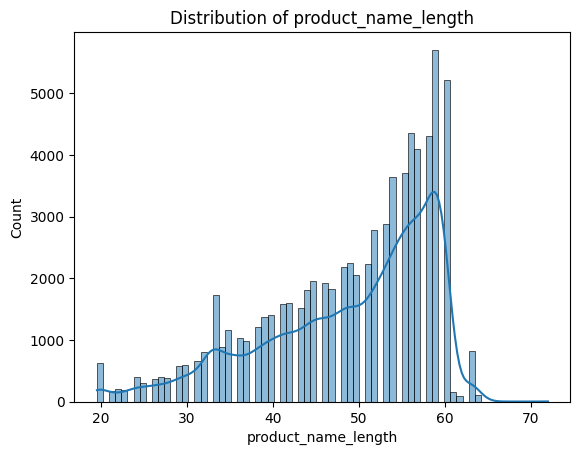

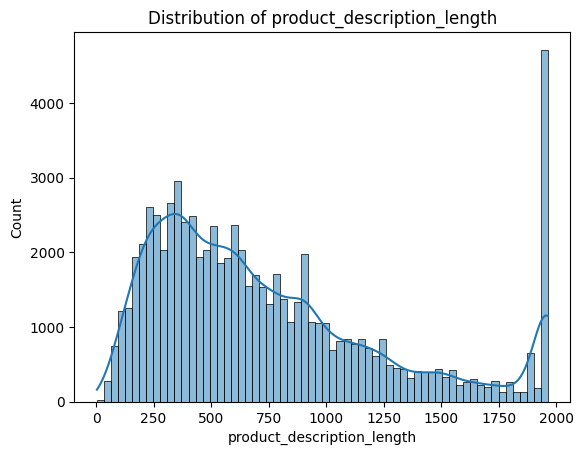

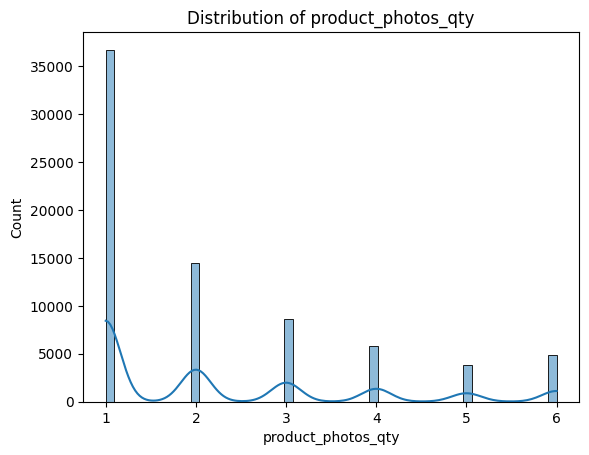

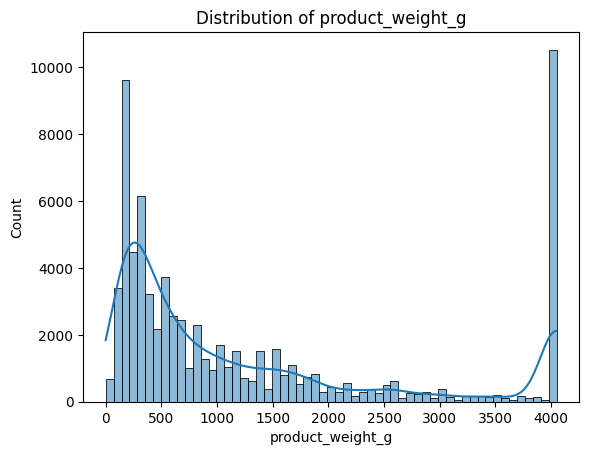

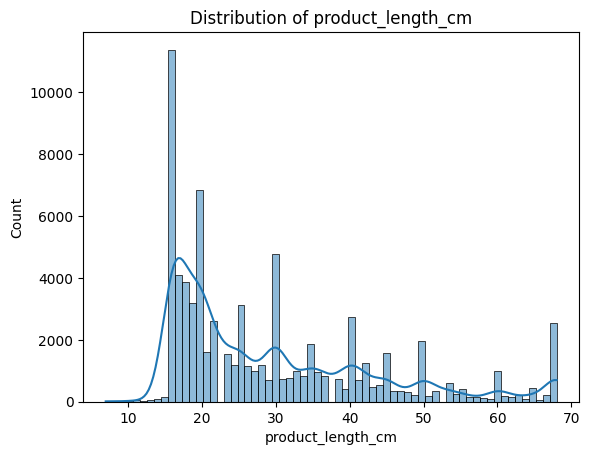

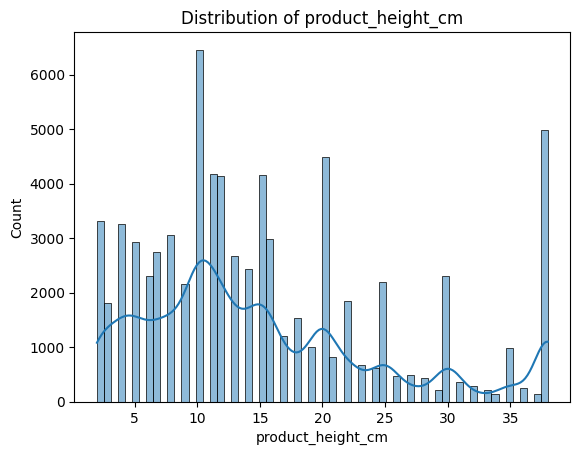

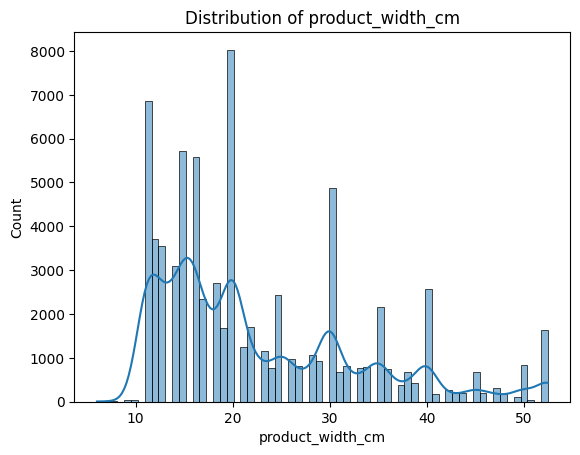

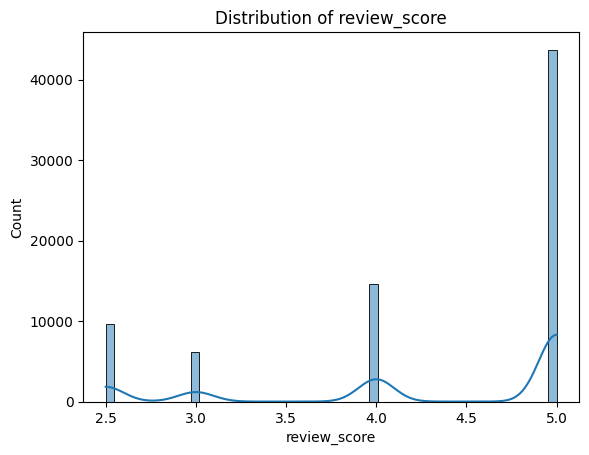

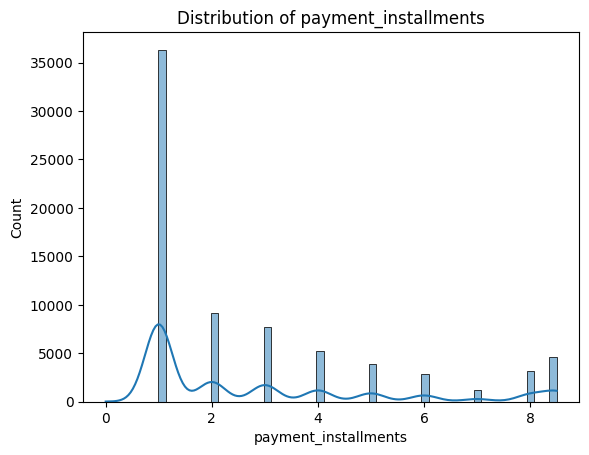

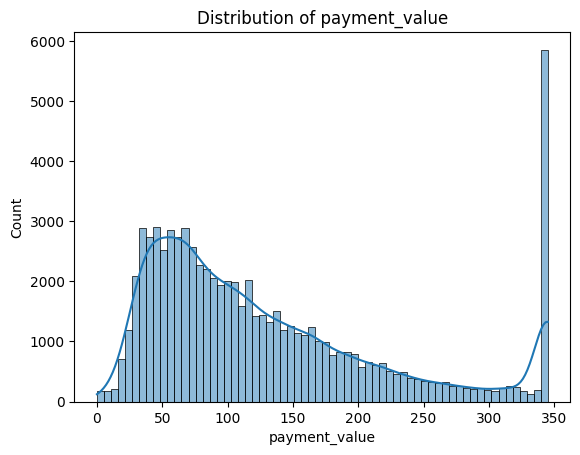

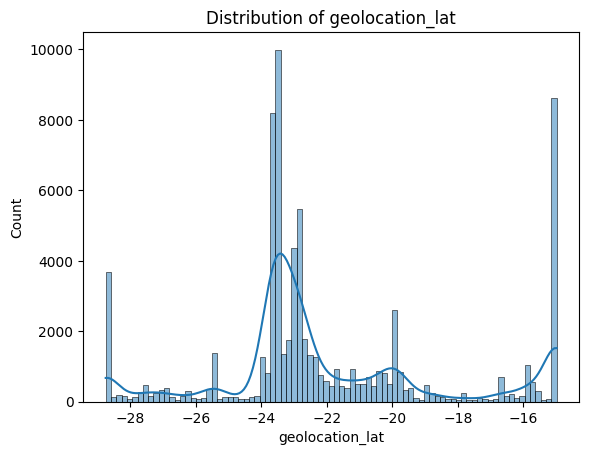

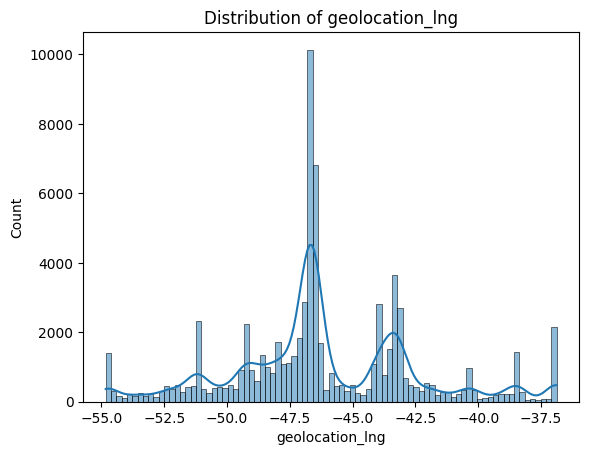

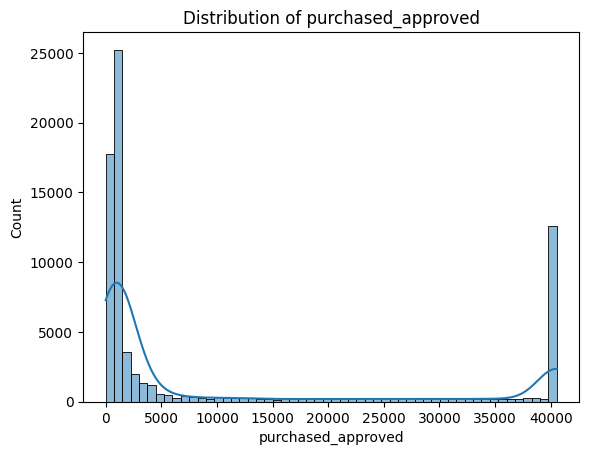

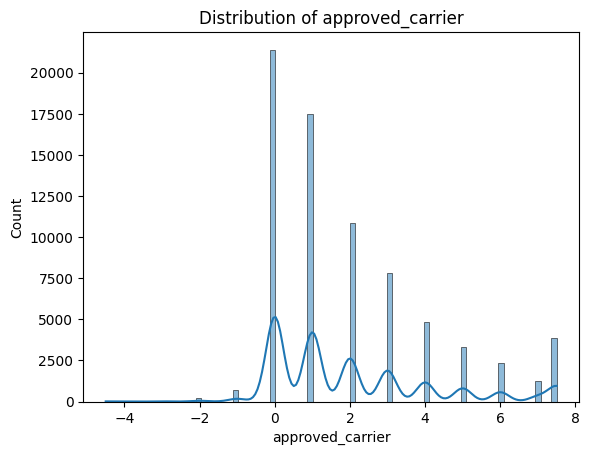

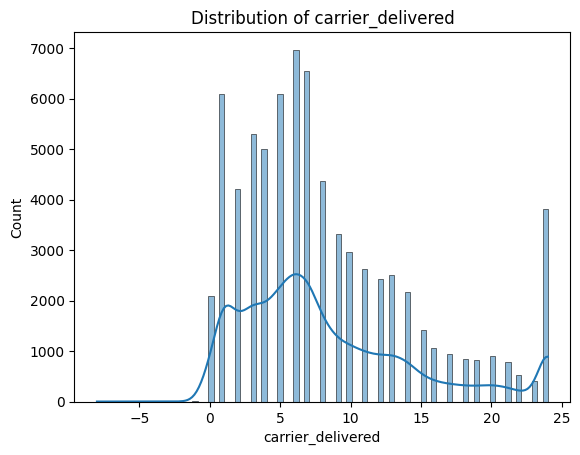

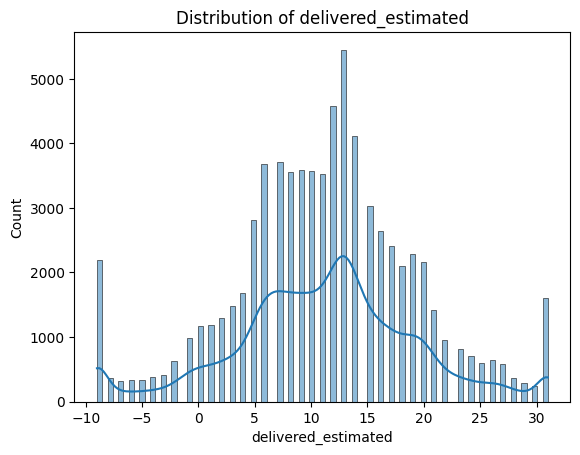

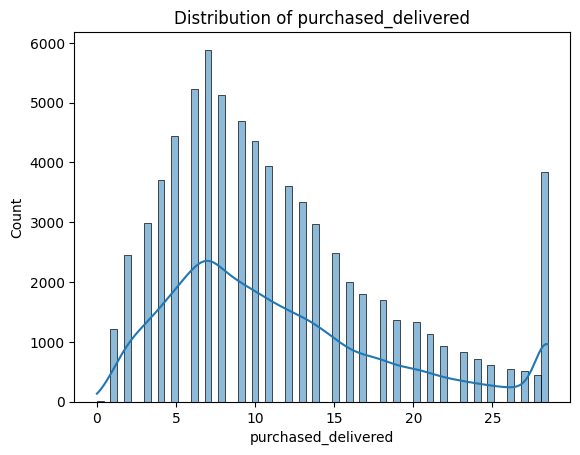

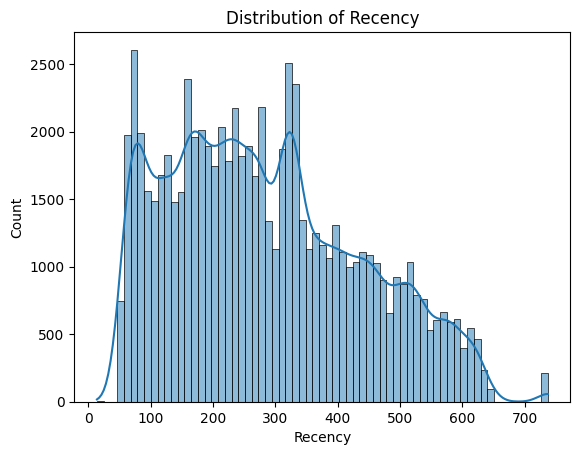

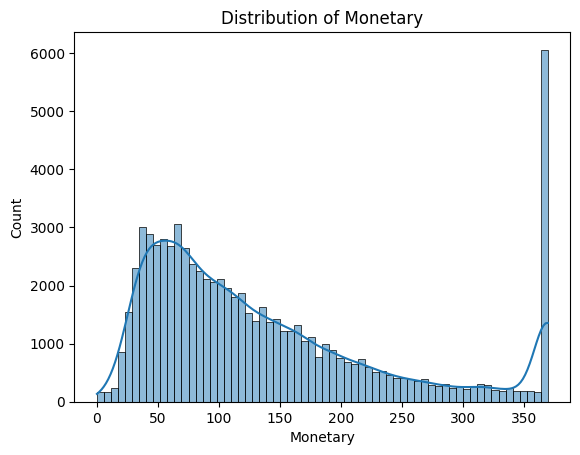

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

for col in X_train.select_dtypes(include=[np.number]).columns:
    sns.histplot(X_train[col], kde=True)  # dengan Kernel Density Estimation
    plt.title(f"Distribution of {col}")
    plt.show()



In [74]:
X_train.describe()

product_name_length  product_description_length  product_photos_qty  \
count         74208.000000                74208.000000        74208.000000   
mean             48.894823                  748.272518            2.190222   
std               9.917767                  514.070836            1.544463   
min              19.500000                    4.000000            1.000000   
25%              42.000000                  349.000000            1.000000   
50%              52.000000                  608.000000            2.000000   
75%              57.000000                  995.000000            3.000000   
max              72.000000                 1964.000000            6.000000   

       product_weight_g  product_length_cm  product_height_cm  \
count      74208.000000       74208.000000       74208.000000   
mean        1298.839748          29.507695          15.328469   
std         1346.565561          14.244313           9.853674   
min            0.000000           7.000000           2.000000   
25%          300.000000          18.000000           8.000000   
50%          700.000000          25.000000          13.000000   
75%         1800.000000          38.000000          20.000000   
max         4050.000000          68.000000          38.000000   

       product_width_cm  review_score  payment_installments  payment_value  \
count      74208.000000  74208.000000          74208.000000   74208.000000   
mean          22.655105      4.309751              2.806860     130.470166   
std           10.547470      0.933030              2.423879      92.797234   
min            6.000000      2.500000              0.000000       0.000000   
25%           15.000000      4.000000              1.000000      59.607500   
50%           20.000000      5.000000              2.000000     102.350000   
75%           30.000000      5.000000              4.000000     173.840000   
max           52.500000      5.000000              8.500000     345.188750   

       geolocation_lat  geolocation_lng  purchased_approved  approved_carrier  \
count     74208.000000     74208.000000        74208.000000      74208.000000   
mean        -21.921905       -46.159752        10512.147882          2.003497   
std           3.589108         3.768272        15631.411094          2.199721   
min         -28.751194       -54.831262            0.000000         -4.500000   
25%         -23.588447       -48.099522          780.000000          0.000000   
50%         -22.925875       -46.631067         1140.000000          1.000000   
75%         -20.146615       -43.611695        16680.000000          3.000000   
max         -14.983868       -36.879955        40530.000000          7.500000   

       carrier_delivered  delivered_estimated  purchased_delivered  \
count       74208.000000         74208.000000         74208.000000   
mean            8.295696            11.111444            11.479072   
std             6.283356             8.269311             7.110530   
min            -8.000000            -9.000000             0.000000   
25%             4.000000             6.000000             6.000000   
50%             7.000000            11.000000            10.000000   
75%            12.000000            16.000000            15.000000   
max            24.000000            31.000000            28.500000   

           Recency     Monetary  
count 74208.000000 74208.000000  
mean    284.545534   138.560665  
std     152.053486   100.670213  
min      14.000000     0.000000  
25%     162.000000    62.010000  
50%     266.000000   107.270000  
75%     392.000000   185.050000  
max     737.000000   369.610000

In [75]:
from sklearn.preprocessing import PowerTransformer

# Kolom yang perlu di-transformasi berdasarkan skewness
columns_to_transform = ['product_description_length', 'product_photos_qty', 'product_weight_g',
                        'product_length_cm', 'product_height_cm', 'product_width_cm', 
                        'payment_installments', 'payment_value', 'purchased_approved',
                        'approved_carrier', 'carrier_delivered', 'Monetary']

# Inisialisasi PowerTransformer
pt = PowerTransformer(method='yeo-johnson')

# Fit dan transformasi data X_train
X_train[columns_to_transform] = pt.fit_transform(X_train[columns_to_transform])

# Terapkan transformasi yang sama pada X_test
X_test[columns_to_transform] = pt.transform(X_test[columns_to_transform])

# Tampilkan hasil beberapa kolom yang sudah ditransformasi
print(X_train[columns_to_transform].head())
print(X_test[columns_to_transform].head())


       product_description_length  product_photos_qty  product_weight_g  \
68154                   -0.028823           -0.948989          1.511969   
17859                    0.186147            0.968646          1.511969   
66145                   -1.403986           -0.948989          0.033816   
11110                   -2.004489           -0.948989         -1.503663   
11160                    0.182136           -0.948989          0.285342   

       product_length_cm  product_height_cm  product_width_cm  \
68154           1.645376           0.091233          1.886466   
17859           1.623591           0.649637          1.812001   
66145           0.425447          -0.253858          0.034348   
11110          -1.534822          -0.671100         -1.095623   
11160           1.364751          -0.132294         -1.329241   

       payment_installments  payment_value  purchased_approved  \
68154             -0.945974       1.768420           -0.570836   
17859              0.68345

In [76]:
# Untuk X_train
numeric_cols_train = X_train.select_dtypes(include=[np.number]).columns
skewness_train = X_train[numeric_cols_train].skew()

# Untuk X_test
numeric_cols_test = X_test.select_dtypes(include=[np.number]).columns
skewness_test = X_test[numeric_cols_test].skew()

# Menampilkan skewness
print("Skewness for X_train:")
print(skewness_train)

print("\nSkewness for X_test:")
print(skewness_test)



Skewness for X_train:
product_name_length          -0.870628
product_description_length   -0.027161
product_photos_qty            0.314875
product_weight_g             -0.001060
product_length_cm             0.126481
product_height_cm            -0.032225
product_width_cm              0.075893
review_score                 -0.952520
payment_installments          0.330329
payment_value                -0.010168
geolocation_lat               0.527628
geolocation_lng               0.264082
purchased_approved            0.026484
approved_carrier             -0.314510
carrier_delivered            -0.160822
delivered_estimated          -0.097823
purchased_delivered           0.881767
Recency                       0.462201
Monetary                     -0.011050
dtype: float64

Skewness for X_test:
product_name_length          -0.890721
product_description_length   -0.020056
product_photos_qty            0.335931
product_weight_g              0.019017
product_length_cm             0.127688
produ

# 5. Feature encoding

In [77]:
# Cek kolom bertipe string di X_train
string_columns_train = X_train.select_dtypes(include='object').columns
print(f"Kolom bertipe string di X_train:\n{string_columns_train}\n")

# Cek kolom bertipe string di X_test
string_columns_test = X_test.select_dtypes(include='object').columns
print(f"Kolom bertipe string di X_test:\n{string_columns_test}\n")

# Periksa apakah kolom string di X_train dan X_test konsisten
if set(string_columns_train) == set(string_columns_test):
    print("Kolom string di X_train dan X_test konsisten.")
else:
    print("Kolom string di X_train dan X_test berbeda.")
    print(f"Kolom string yang ada di X_train tetapi tidak di X_test: {set(string_columns_train) - set(string_columns_test)}")
    print(f"Kolom string yang ada di X_test tetapi tidak di X_train: {set(string_columns_test) - set(string_columns_train)}")


Kolom bertipe string di X_train:
Index(['customer_city', 'customer_state', 'order_status',
       'product_category_name', 'seller_city', 'seller_state', 'payment_type'],
      dtype='object')

Kolom bertipe string di X_test:
Index(['customer_city', 'customer_state', 'order_status',
       'product_category_name', 'seller_city', 'seller_state', 'payment_type'],
      dtype='object')

Kolom string di X_train dan X_test konsisten.


In [78]:
from sklearn.preprocessing import LabelEncoder

# 1. Apply One-Hot Encoding to nominal categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=['customer_city', 'customer_state', 'seller_city', 'seller_state', 'product_category_name', 'payment_type'], drop_first=True)
X_test_encoded = pd.get_dummies(X_test, columns=['customer_city', 'customer_state', 'seller_city', 'seller_state', 'product_category_name', 'payment_type'], drop_first=True)

# 2. Apply Label Encoding to the ordinal 'order_status' column
le = LabelEncoder()
X_train_encoded['order_status_encoded'] = le.fit_transform(X_train_encoded['order_status'])
X_test_encoded['order_status_encoded'] = le.transform(X_test_encoded['order_status'])  # Use the same transformation for X_test

# Drop the original 'order_status' column after encoding
X_train_encoded.drop(['order_status'], axis=1, inplace=True)
X_test_encoded.drop(['order_status'], axis=1, inplace=True)

# Drop other columns that are no longer needed
# If there are any extra columns not needed after encoding (such as the old non-encoded versions)
# columns_to_drop = ['customer_city', 'customer_state', 'seller_city', 'seller_state', 'product_category_name', 'payment_type']
# X_train_encoded.drop(columns=columns_to_drop, axis=1, inplace=True)
# X_test_encoded.drop(columns=columns_to_drop, axis=1, inplace=True)



In [79]:
X_train_encoded

product_name_length  product_description_length  product_photos_qty  \
68154            52.000000                   -0.028823           -0.948989   
17859            53.000000                    0.186147            0.968646   
66145            33.000000                   -1.403986           -0.948989   
11110            26.000000                   -2.004489           -0.948989   
11160            40.000000                    0.182136           -0.948989   
...                    ...                         ...                 ...   
82859            56.000000                   -1.600510            1.495330   
47012            51.000000                    0.020312           -0.948989   
58025            48.000000                   -0.803074           -0.948989   
37718            27.000000                    0.486284            1.495330   
76316            55.000000                    0.852484           -0.948989   

       product_weight_g  product_length_cm  product_height_cm  \
68154          1.511969           1.645376           0.091233   
17859          1.511969           1.623591           0.649637   
66145          0.033816           0.425447          -0.253858   
11110         -1.503663          -1.534822          -0.671100   
11160          0.285342           1.364751          -0.132294   
...                 ...                ...                ...   
82859          1.511969           0.746331          -0.132294   
47012          0.193190          -0.002548          -0.132294   
58025          0.870284           0.628021           1.809044   
37718         -0.765124          -0.337131          -1.011681   
76316          1.511969           0.184877           1.809044   

       product_width_cm  review_score  payment_installments  payment_value  \
68154          1.886466      5.000000             -0.945974       1.768420   
17859          1.812001      5.000000              0.683456       0.472944   
66145          0.034348      4.000000             -0.945974      -1.227243   
11110         -1.095623      4.000000             -0.945974      -0.644687   
11160         -1.329241      5.000000              1.207371      -0.798319   
...                 ...           ...                   ...            ...   
82859          0.916409      5.000000             -0.945974       0.985647   
47012          1.358351      3.000000             -0.945974       1.768420   
58025         -0.089320      5.000000              1.583203       1.033063   
37718         -0.524708      4.000000             -0.945974       0.228023   
76316          1.886466      5.000000              1.583203       1.768420   

       geolocation_lat  geolocation_lng  purchased_approved  approved_carrier  \
68154       -24.348163       -50.613418           -0.570836         -0.997097   
17859       -28.751194       -53.090459            0.141757         -0.997097   
66145       -23.656294       -46.554122           -0.606066         -0.307471   
11110       -28.751194       -53.677306            1.423873         -0.997097   
11160       -23.640572       -46.570773            0.811441          1.862523   
...                ...              ...                 ...               ...   
82859       -23.460003       -46.494691            1.547362         -0.997097   
47012       -16.738273       -49.199837           -1.029983         -0.307471   
58025       -23.746060       -46.550430           -0.570836          0.979844   
37718       -25.491607       -49.282837            1.547362          1.301467   
76316       -14.983868       -40.841375           -0.606066          0.200927   

       carrier_delivered  delivered_estimated  purchased_delivered    Recency  \
68154           0.004082            13.000000             8.000000 475.000000   
17859           0.863544            11.000000            14.000000 238.000000   
66145          -0.846373             9.000000             5.000000  73.000000   
11110           0.863544            18.000000          